<a href="https://colab.research.google.com/github/edrijimz/Proyecto-Data-Science/blob/main/Proyecto_Data_Science2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")


#medals_url = "https://github.com/samuelsaldanav/datasets/blob/d4d2c665362c034bbfff5a977faf8b23f8b5924a/House%20Prices%20-%20Advanced%20Regression%20Techniques/House-Prices-Advanced.csv"

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
mainpath = ("/content/drive/MyDrive/Colab Notebooks/Proyecto Data Science/")
filename = "adult.csv"
fullpath = os.path.join(mainpath, filename)

In [4]:
data = pd.read_csv(fullpath)
data.head()
print(data.shape)

(32561, 15)


In [5]:
def buscar_dummy_columns(data, dummy_value='?'):
    dummy_columns = []
    for col in data.columns:
        if data[data[col] == dummy_value].shape[0] > 0:
            dummy_columns.append(col)
    return dummy_columns

dummy_columns = buscar_dummy_columns(data)

print("Columnas con dummies:")
for col in dummy_columns:
    print(f"Columna '{col}' tiene dummies.")

Columnas con dummies:
Columna 'workclass' tiene dummies.
Columna 'occupation' tiene dummies.
Columna 'native.country' tiene dummies.


In [6]:
data.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [ ]:
valor_dummy = '?'
valores_dummy = (data == valor_dummy).sum()

# Convertir la Serie a un DataFrame
valores_dummy = pd.DataFrame(valores_dummy, columns=['count'])

# Calcular el porcentaje de valores "?" en cada columna
sum_total = len(data)
valores_dummy['percentage'] = (valores_dummy['count'] / sum_total) * 100

# Redondear los porcentajes a tres decimales
valores_dummy['percentage'] = round(valores_dummy['percentage'], 3)

# Ordenar por el porcentaje de valores "?" en orden descendente
valores_dummy = valores_dummy.sort_values('percentage', ascending=False)

print(valores_dummy)

                count  percentage
occupation       1843       5.660
workclass        1836       5.639
native.country    583       1.790
age                 0       0.000
fnlwgt              0       0.000
education           0       0.000
education.num       0       0.000
marital.status      0       0.000
relationship        0       0.000
race                0       0.000
sex                 0       0.000
capital.gain        0       0.000
capital.loss        0       0.000
hours.per.week      0       0.000
income              0       0.000


<ipython-input-42-a27d4f29fb2f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores_dummy.index, y=valores_dummy['count'], palette='viridis')


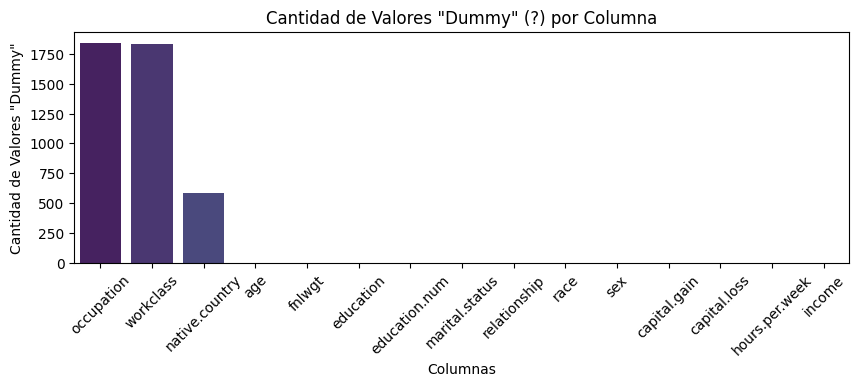

In [ ]:
plt.figure(figsize=(10, 3))
sns.barplot(x=valores_dummy.index, y=valores_dummy['count'], palette='viridis')

plt.title('Cantidad de Valores "Dummy" (?) por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores "Dummy"')
plt.xticks(rotation=45)
plt.show()

<ipython-input-31-e2e24552621d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores_dummy.index, y=valores_dummy['percentage'], palette='viridis')


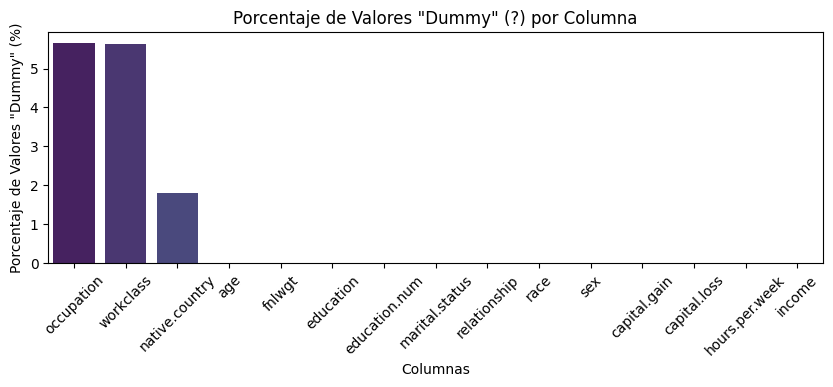

In [ ]:


# Plotear el porcentaje
plt.figure(figsize=(10, 3))
sns.barplot(x=valores_dummy.index, y=valores_dummy['percentage'], palette='viridis')

plt.title('Porcentaje de Valores "Dummy" (?) por Columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Valores "Dummy" (%)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
bool_df = data.applymap(lambda x: x == '?')
buscar_vacios = bool_df.sum()
print("\nNúmero de veces que '?' aparece en cada columna:")



Número de veces que '?' aparece en cada columna:


In [ ]:
dummy_data = pd.DataFrame(list(dummy_counts.items()), columns=['Column', 'Dummy Count'])
dummy_data['Percentage'] = dummy_data['Dummy Count'] / len(data) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Percentage', data=dummy_data, palette='viridis')
plt.title('Porcentaje de Datos Dummies por Columna')
plt.ylabel('Porcentaje')
plt.xlabel('Columna')
plt.show()

NameError: name 'dummy_counts' is not defined

In [ ]:
data_dummies = pd.get_dummies(data, columns=['marital.status'])
print(data_dummies)

In [ ]:
def show_dummy_values(data, column, dummy_value='?'):
    # Filtrar las filas que contienen el valor dummy
    dummy_rows = data[data[column] == dummy_value]
    if not dummy_rows.empty:
        print(f"\nFilas que contienen el valor dummy '{dummy_value}' en la columna '{column}':")
        print(dummy_rows)
    else:
        print(f"\nNo se encontraron valores dummy '{dummy_value}' en la columna '{column}'.")

# Buscar valores dummy en cada columna del DataFrame
for col in data.columns:
    show_dummy_values(data, col)


No se encontraron valores dummy '?' en la columna 'age'.

Filas que contienen el valor dummy '?' en la columna 'workclass':
       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
14      51         ?  172175     Doctorate             16       Never-married   
24      61         ?  135285       HS-grad              9  Married-civ-spouse   
44      71         ?  100820       HS-grad              9  Married-civ-spouse   
...    ...       ...     ...           ...            ...                 ...   
32533   35         ?  320084     Bachelors             13  Married-civ-spouse   
32534   30         ?   33811     Bachelors             13       Never-married   
32541   71         ?  287372     Doctorate             16  Married-civ-spouse   
32543   41         ?  202822       HS-grad              9        

In [ ]:
print(data_dummies)

       age  fnlwgt  education.num      marital.status         occupation  \
0       90   77053              9             Widowed                  ?   
1       82  132870              9             Widowed    Exec-managerial   
2       66  186061             10             Widowed                  ?   
3       54  140359              4            Divorced  Machine-op-inspct   
4       41  264663             10           Separated     Prof-specialty   
...    ...     ...            ...                 ...                ...   
32556   22  310152             10       Never-married    Protective-serv   
32557   27  257302             12  Married-civ-spouse       Tech-support   
32558   40  154374              9  Married-civ-spouse  Machine-op-inspct   
32559   58  151910              9             Widowed       Adm-clerical   
32560   22  201490              9       Never-married       Adm-clerical   

        relationship   race     sex  capital.gain  capital.loss  ...  \
0      Not-in-f

In [ ]:
data.head()


age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [ ]:
def show_dummy_values(data, column, dummy_value='?'):
    # Filtrar las filas que contienen el valor dummy
    dummy_rows = data[data[column] == dummy_value]
    if not dummy_rows.empty:
        print(f"\nFilas que contienen el valor dummy '{dummy_value}' en la columna '{column}':")
        print(dummy_rows)
    else:
        print(f"\nNo se encontraron valores dummy '{dummy_value}' en la columna '{column}'.")

# Buscar valores dummy en cada columna del DataFrame
for col in data.columns:
    show_dummy_values(data, col)


No se encontraron valores dummy '?' en la columna 'age'.

Filas que contienen el valor dummy '?' en la columna 'workclass':
       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
14      51         ?  172175     Doctorate             16       Never-married   
24      61         ?  135285       HS-grad              9  Married-civ-spouse   
44      71         ?  100820       HS-grad              9  Married-civ-spouse   
...    ...       ...     ...           ...            ...                 ...   
32533   35         ?  320084     Bachelors             13  Married-civ-spouse   
32534   30         ?   33811     Bachelors             13       Never-married   
32541   71         ?  287372     Doctorate             16  Married-civ-spouse   
32543   41         ?  202822       HS-grad              9        

In [ ]:
show_dummy_values(data, 'occupation')


Filas que contienen el valor dummy '?' en la columna 'occupation':
       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
14      51         ?  172175     Doctorate             16       Never-married   
24      61         ?  135285       HS-grad              9  Married-civ-spouse   
44      71         ?  100820       HS-grad              9  Married-civ-spouse   
...    ...       ...     ...           ...            ...                 ...   
32533   35         ?  320084     Bachelors             13  Married-civ-spouse   
32534   30         ?   33811     Bachelors             13       Never-married   
32541   71         ?  287372     Doctorate             16  Married-civ-spouse   
32543   41         ?  202822       HS-grad              9           Separated   
32544   72         ?  129912       HS-gra

In [7]:
def compare_dummy_values(data, column, dummy_value='?'):
    # Filtrar las filas que contienen el valor dummy
    dummy_rows = data[data[column] == dummy_value]
    dummy_count = dummy_rows.shape[0]

    # Filtrar las filas que no contienen el valor dummy
    non_dummy_rows = data[data[column] != dummy_value]
    non_dummy_count = non_dummy_rows.shape[0]

    # Mostrar resultados
    print(f"\nComparación para la columna '{column}':")
    print(f"- Valores dummy '{dummy_value}': {dummy_count} filas")
    print(f"- Valores no dummy: {non_dummy_count} filas")

    # Mostrar algunas filas con valores dummy
    if dummy_count > 0:
        print(f"\nEjemplos de filas con valor dummy '{dummy_value}':")
        print(dummy_rows.head(5))  # Mostrar solo las primeras 5 filas

    # Mostrar algunas filas sin valores dummy
    if non_dummy_count > 0:
        print(f"\nEjemplos de filas sin valor dummy en la columna '{column}':")
        print(non_dummy_rows.head(5))  # Mostrar solo las primeras 5 filas

compare_dummy_values(data, 'workclass')



Comparación para la columna 'workclass':
- Valores dummy '?': 1836 filas
- Valores no dummy: 30725 filas

Ejemplos de filas con valor dummy '?':
    age workclass  fnlwgt     education  education.num      marital.status  \
0    90         ?   77053       HS-grad              9             Widowed   
2    66         ?  186061  Some-college             10             Widowed   
14   51         ?  172175     Doctorate             16       Never-married   
24   61         ?  135285       HS-grad              9  Married-civ-spouse   
44   71         ?  100820       HS-grad              9  Married-civ-spouse   

   occupation   relationship   race     sex  capital.gain  capital.loss  \
0           ?  Not-in-family  White  Female             0          4356   
2           ?      Unmarried  Black  Female             0          4356   
14          ?  Not-in-family  White    Male             0          2824   
24          ?        Husband  White    Male             0          2603   
44        

In [ ]:
def show_dummy_values(data, column, dummy_value='?'):

    dummy_rows = data[data[column] == dummy_value]
    dummy_count = dummy_rows.shape[0]
    if dummy_count > 0:
        print(f"\nColumna '{column}' tiene {dummy_count} valor(es) dummy '{dummy_value}'.")
        print(dummy_rows)
    else:
        print(f"\nNo se encontraron valores dummy '{dummy_value}' en la columna '{column}'.")

for col in data.columns:
    show_dummy_values(data, col)


No se encontraron valores dummy '?' en la columna 'age'.

Columna 'workclass' tiene 1836 valor(es) dummy '?'.
       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
14      51         ?  172175     Doctorate             16       Never-married   
24      61         ?  135285       HS-grad              9  Married-civ-spouse   
44      71         ?  100820       HS-grad              9  Married-civ-spouse   
...    ...       ...     ...           ...            ...                 ...   
32533   35         ?  320084     Bachelors             13  Married-civ-spouse   
32534   30         ?   33811     Bachelors             13       Never-married   
32541   71         ?  287372     Doctorate             16  Married-civ-spouse   
32543   41         ?  202822       HS-grad              9           Separated  

In [8]:
def show_dummy_values(data, column, dummy_value='?'):
    # Filtrar las filas que contienen el valor dummy
    dummy_rows = data[data[column] == dummy_value]
    if not dummy_rows.empty:
        print(f"\nFilas que contienen el valor dummy '{dummy_value}' en la columna '{column}':")
        print(dummy_rows)
    else:
        print(f"\nNo se encontraron valores dummy '{dummy_value}' en la columna '{column}'.")

# Buscar valores dummy en cada columna del DataFrame
for col in data.columns:
    show_dummy_values(data, col)


No se encontraron valores dummy '?' en la columna 'age'.

Filas que contienen el valor dummy '?' en la columna 'workclass':
       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
14      51         ?  172175     Doctorate             16       Never-married   
24      61         ?  135285       HS-grad              9  Married-civ-spouse   
44      71         ?  100820       HS-grad              9  Married-civ-spouse   
...    ...       ...     ...           ...            ...                 ...   
32533   35         ?  320084     Bachelors             13  Married-civ-spouse   
32534   30         ?   33811     Bachelors             13       Never-married   
32541   71         ?  287372     Doctorate             16  Married-civ-spouse   
32543   41         ?  202822       HS-grad              9        

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
data["age"].describe()
data["age"].unique()
data["age"].mode()
print("El más común es", data["age"].mode())
#print(data["age"].unique())


val_unique = data["age"].unique()
val_unique.sort()  # Ordenarlos
val_unique = val_unique[::-1]
print(val_unique)
#

El más común es 0    36
Name: age, dtype: int64
[90 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70 69 68 67 66
 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43 42
 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18
 17]


In [ ]:
data["workclass"].describe()
data["workclass"].unique()
data["workclass"].mode()
print("El más común es", data["workclass"].mode())
print(data["workclass"].unique())
unm = data["workclass"].value_counts().max
print(unm)

El más común es 0    Private
Name: workclass, dtype: object
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
<bound method NDFrame._add_numeric_operations.<locals>.max of workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64>


In [ ]:
data["education"].describe()
data["education"].unique()
data["education"].mode()
print("El más común es", data["education"].mode())
unm = data["education"].value_counts().max
print(unm)
print(data["education"].unique())

El más común es 0    HS-grad
Name: education, dtype: object
<bound method NDFrame._add_numeric_operations.<locals>.max of education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64>
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']


In [ ]:
data['marital.status'].describe()
data['marital.status'].unique()
data['marital.status'].mode()
print("El más común es", data['marital.status'].mode())
print(data['marital.status'].unique())
unm = data["marital.status"].value_counts().max
print(unm)

El más común es 0    Married-civ-spouse
Name: marital.status, dtype: object
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
<bound method NDFrame._add_numeric_operations.<locals>.max of marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64>


In [ ]:
data['relationship'].describe()
data['relationship'].unique()
data["relationship"].value_counts()["Wife"]
data['relationship'].mode()
print("El más común es", data['relationship'].mode())
print(data['relationship'].unique())
unm = data["relationship"].value_counts().idxmin
print(unm)

El más común es 0    Husband
Name: relationship, dtype: object
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
<bound method Series.idxmin of relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64>


In [ ]:
data["race"].describe()
data["race"].unique()
data['race'].mode()
print("El más común es", data['race'].mode())
print(data['race'].unique())
unm = data["race"].value_counts().max
print(unm)

El más común es 0    White
Name: race, dtype: object
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
<bound method NDFrame._add_numeric_operations.<locals>.max of race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64>


In [ ]:
data["sex"].describe()
data["sex"].unique()
data['sex'].mode()
print("El más común es", data['sex'].mode())
print(data['sex'].unique())
unm = data["sex"].value_counts().max
print(unm)

El más común es 0    Male
Name: sex, dtype: object
['Female' 'Male']
<bound method NDFrame._add_numeric_operations.<locals>.max of sex
Male      21790
Female    10771
Name: count, dtype: int64>


In [ ]:
data["hours.per.week"].describe()
data["hours.per.week"].unique()
data["hours.per.week"].mode()
print("El más común es", data["hours.per.week"].mode())
#print(data["age"].unique())


val_unique = data["hours.per.week"].unique()
val_unique.sort()  # Ordenarlos
val_unique = val_unique[::-1]
print(val_unique)
unm = data["hours.per.week"].value_counts().min
print("El orden es ", unm)

El más común es 0    40
Name: hours.per.week, dtype: int64
[99 98 97 96 95 94 92 91 90 89 88 87 86 85 84 82 81 80 78 77 76 75 74 73
 72 70 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47
 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23
 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1]
El orden es  <bound method NDFrame._add_numeric_operations.<locals>.min of hours.per.week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
94        1
82        1
92        1
87        1
74        1
Name: count, Length: 94, dtype: int64>


In [ ]:
data["native.country"].describe()
data["native.country"].unique()
data['native.country'].mode()
print("El más común es", data['native.country'].mode())
print(data['native.country'].unique())
unm = data["native.country"].value_counts().min
print(unm)

El más común es 0    United-States
Name: native.country, dtype: object
['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia'
 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland'
 'Portugal' 'Laos' 'Thailand' 'Outlying-US(Guam-USVI-etc)']
<bound method NDFrame._add_numeric_operations.<locals>.min of native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                

In [ ]:
data["income"].describe()
data["income"].unique()
data["income"].mode()
print("El más común es", data["income"].mode())
unm = data["income"].value_counts().max
print(unm)

El más común es 0    <=50K
Name: income, dtype: object
<bound method NDFrame._add_numeric_operations.<locals>.max of income
<=50K    24720
>50K      7841
Name: count, dtype: int64>


In [ ]:
data.select_dtypes(include=['int64', 'float64'])

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week
0       90   77053              9             0          4356              40
1       82  132870              9             0          4356              18
2       66  186061             10             0          4356              40
3       54  140359              4             0          3900              40
4       41  264663             10             0          3900              40
...    ...     ...            ...           ...           ...             ...
32556   22  310152             10             0             0              40
32557   27  257302             12             0             0              38
32558   40  154374              9             0             0              40
32559   58  151910              9             0             0              40
32560   22  201490              9             0             0              20

[32561 rows x 6 columns]

In [ ]:
data.groupby(['education', 'workclass']).size().unstack(fill_value=0)

workclass       ?  Federal-gov  Local-gov  Never-worked  Private  \
education                                                          
10th          100            6         31             2      695   
11th          118            9         36             1      923   
12th           40            5         19             0      333   
1st-4th        12            0          4             0      136   
5th-6th        30            1          9             0      266   
7th-8th        72            2         28             1      424   
9th            51            3         23             0      387   
Assoc-acdm     47           55         88             0      729   
Assoc-voc      61           38         86             0     1005   
Bachelors     173          212        477             0     3551   
Doctorate      15           16         27             0      181   
HS-grad       532          263        503             1     7780   
Masters        48           67        342             0      894   
Preschool       5            0          4             0       41   
Prof-school    18           29         29             0      257   
Some-college  514          254        387             2     5094   

workclass     Self-emp-inc  Self-emp-not-inc  State-gov  Without-pay  
education                                                             
10th                    19                67         13            0  
11th                    14                60         14            0  
12th                     7                19         10            0  
1st-4th                  2                13          1            0  
5th-6th                  4                19          4            0  
7th-8th                 14                94         10            1  
9th                     10                34          6            0  
Assoc-acdm              35                71         41            1  
Assoc-voc               38               108         46            0  
Bachelors              273               399        270            0  
Doctorate               35                50         89            0  
HS-grad                279               866        268            9  
Masters                 79               124        169            0  
Preschool                0                 0          1            0  
Prof-school             81               131         31            0  
Some-college           226               486        325            3

In [ ]:
data.groupby(['education', 'income']).size().unstack(fill_value=0)

In [ ]:
data.groupby(['occupation', 'workclass']).size().unstack(fill_value=0)

In [ ]:
data.groupby(['occupation', 'income']).size().unstack(fill_value=0)

In [ ]:
data.groupby(['marital.status', 'income']).size().unstack(fill_value=0)

In [ ]:
data.groupby(['age', 'income']).size().unstack(fill_value=0)

In [ ]:
data.groupby(['race', 'income']).size().unstack(fill_value=0)

In [ ]:
data.groupby(['education', 'race']).size().unstack(fill_value=0)

In [ ]:
data.groupby(['occupation', 'race']).size().unstack(fill_value=0)

In [9]:
# Crear un DataFrame booleano donde True indica la presencia de "?"
bool_df = data.applymap(lambda x: x == '?')

# Sumar los valores True por columna para contar las ocurrencias de "?"
buscar_vacios = bool_df.sum()

print("\nNúmero de veces que '?' aparece en cada columna:")
print(buscar_vacios)


Número de veces que '?' aparece en cada columna:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


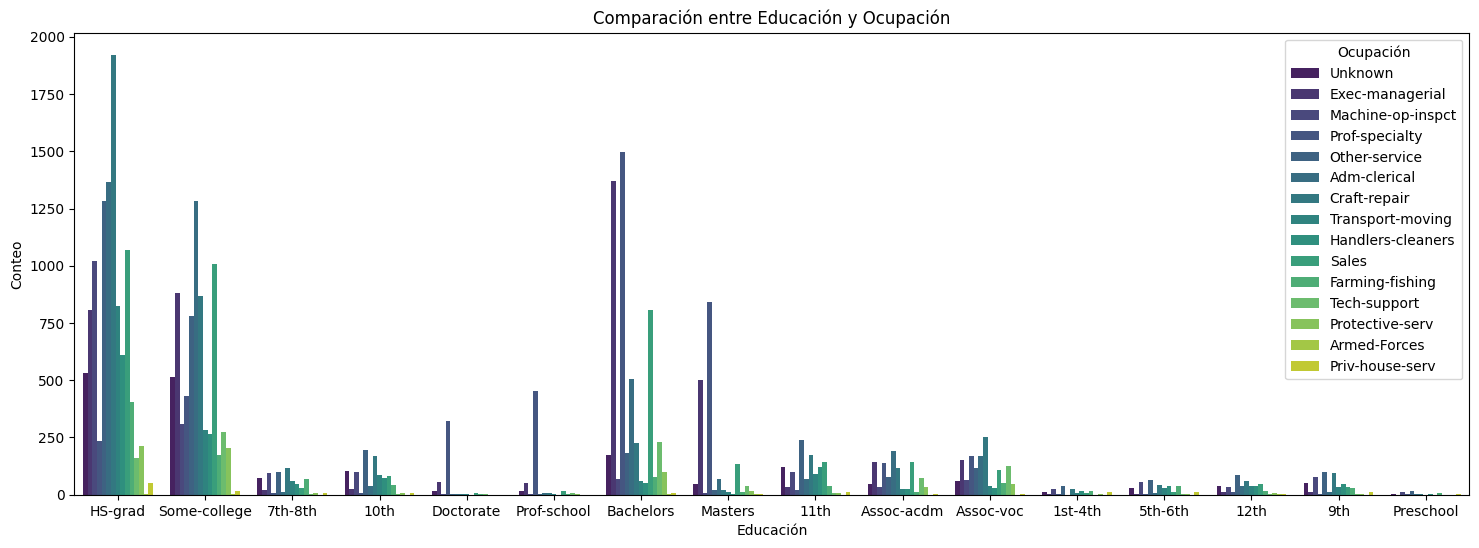

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(data=data, x='education', hue='occupation', palette='viridis')
plt.title('Comparación entre Educación y Ocupación')
plt.xlabel('Educación')
plt.ylabel('Conteo')
plt.legend(title='Ocupación')
plt.show()

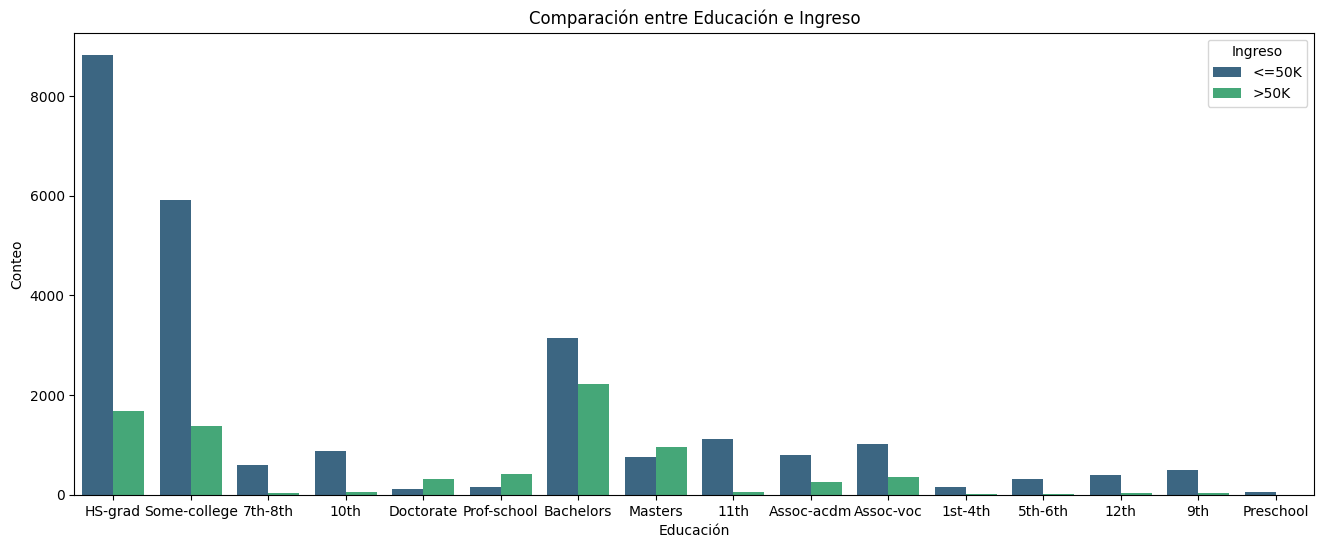

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(data=data, x='education', hue='income', palette='viridis')
plt.title('Comparación entre Educación e Ingreso')
plt.xlabel('Educación')
plt.ylabel('Conteo')
plt.legend(title='Ingreso')
plt.show()

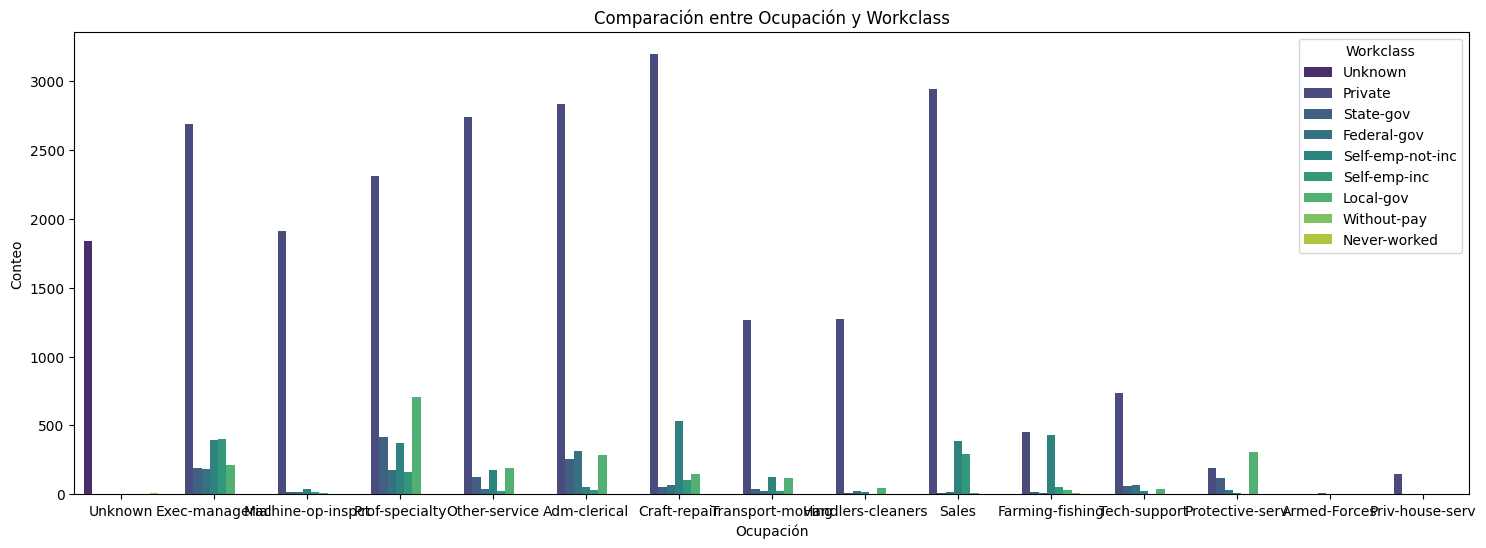

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(data=data, x='occupation', hue='workclass', palette='viridis')
plt.title('Comparación entre Ocupación y Workclass')
plt.xlabel('Ocupación')
plt.ylabel('Conteo')
plt.legend(title='Workclass')
plt.show()

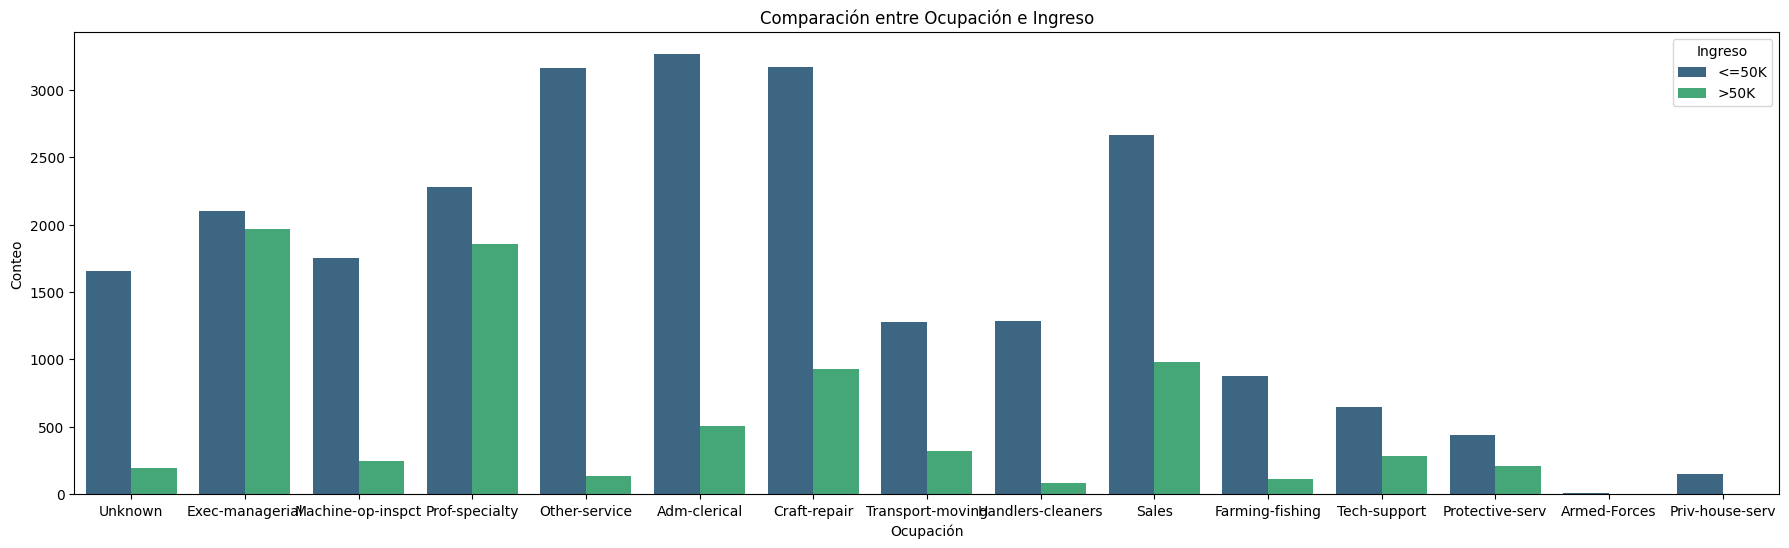

In [ ]:
plt.figure(figsize=(22, 6))
sns.countplot(data=data, x='occupation', hue='income', palette='viridis')
plt.title('Comparación entre Ocupación e Ingreso')
plt.xlabel('Ocupación')
plt.ylabel('Conteo')
plt.legend(title='Ingreso')
plt.show()

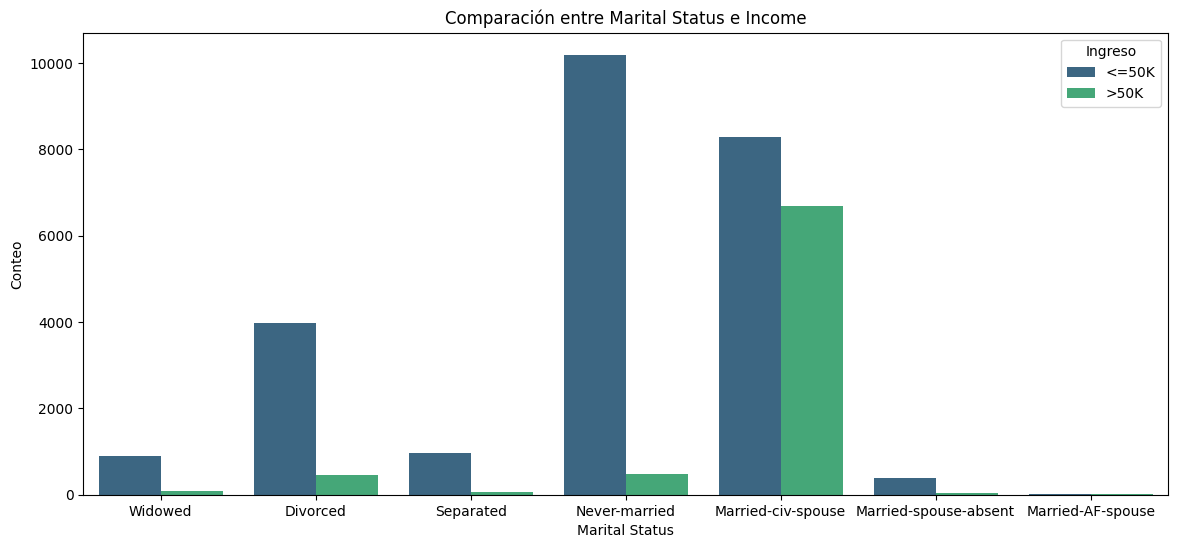

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='marital.status', hue='income', palette='viridis')
plt.title('Comparación entre Marital Status e Income')
plt.xlabel('Marital Status')
plt.ylabel('Conteo')
plt.legend(title='Ingreso')
plt.show()

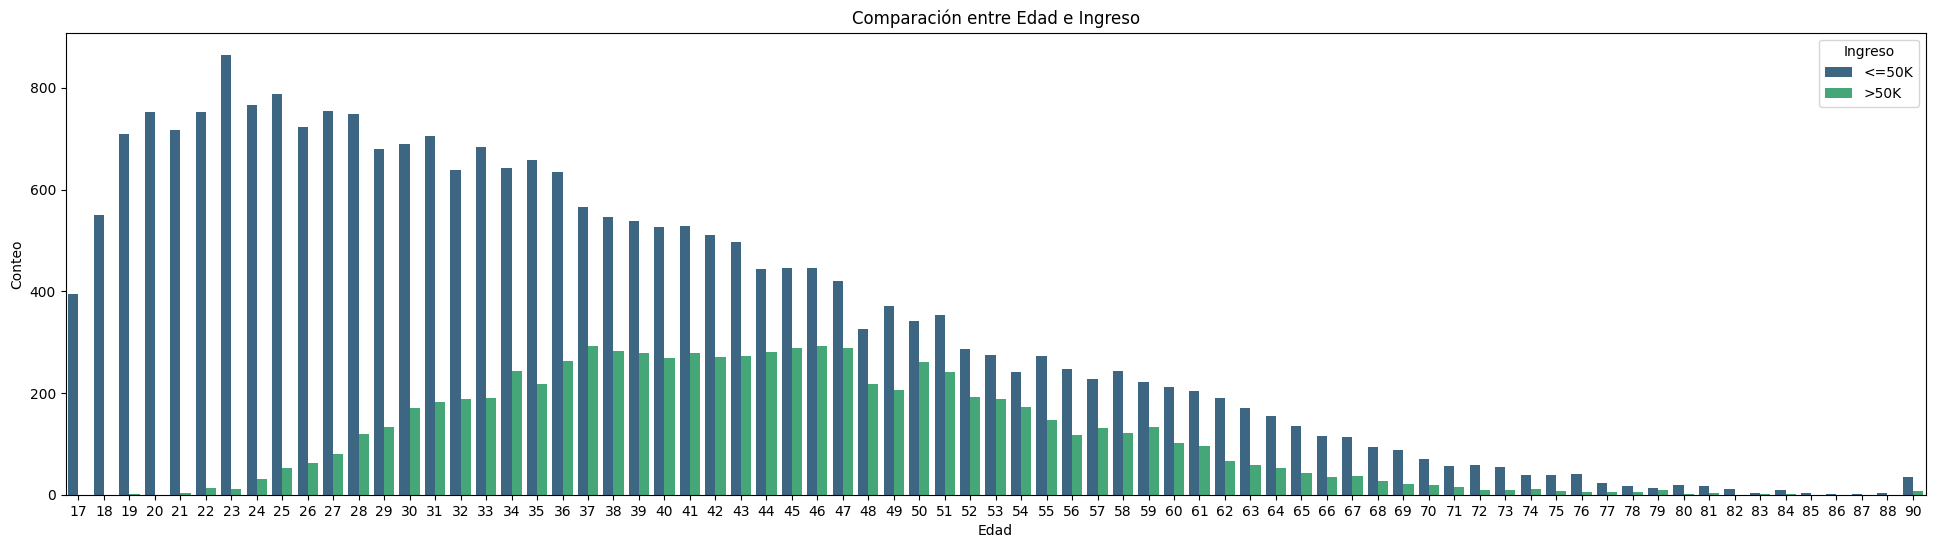

In [ ]:
plt.figure(figsize=(24, 6))
sns.countplot(data=data, x='age', hue='income', palette='viridis')
plt.title('Comparación entre Edad e Ingreso')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.legend(title='Ingreso')
plt.show()

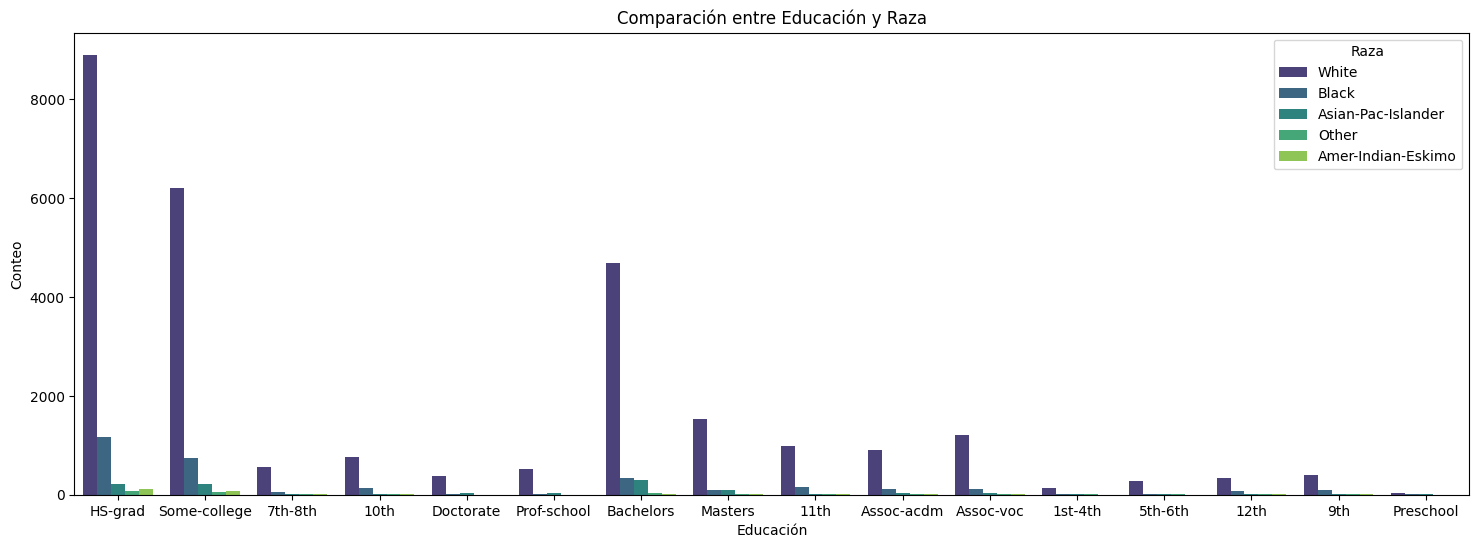

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(data=data, x='education', hue='race', palette='viridis')
plt.title('Comparación entre Educación y Raza')
plt.xlabel('Educación')
plt.ylabel('Conteo')
plt.legend(title='Raza')
plt.show()

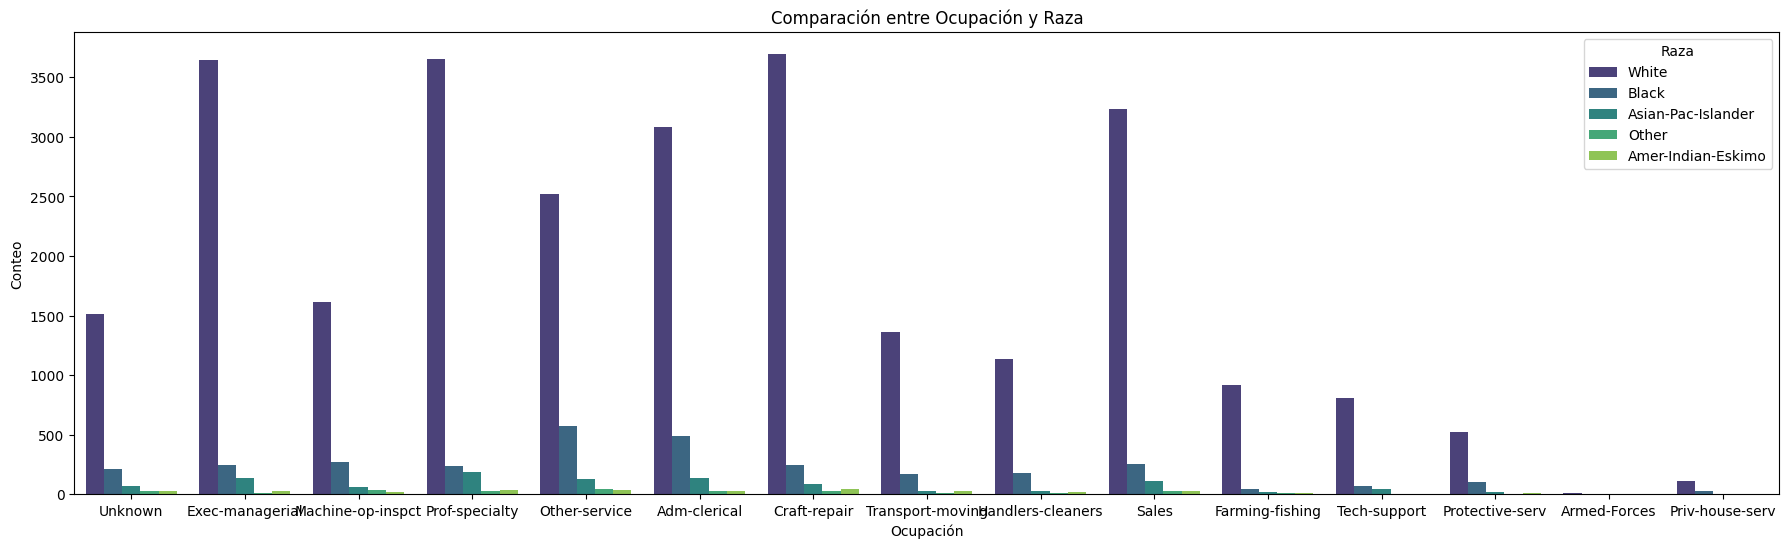

In [ ]:
plt.figure(figsize=(22, 6))
sns.countplot(data=data, x='occupation', hue='race', palette='viridis')
plt.title('Comparación entre Ocupación y Raza')
plt.xlabel('Ocupación')
plt.ylabel('Conteo')
plt.legend(title='Raza')
plt.show()

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [ ]:
data.duplicated().sum()

24

In [ ]:
data[data.duplicated()]

age         workclass  fnlwgt     education  education.num  \
8453    25           Private  308144     Bachelors             13   
8645    90           Private   52386  Some-college             10   
12202   21           Private  250051  Some-college             10   
14346   20           Private  107658  Some-college             10   
15603   25           Private  195994       1st-4th              2   
17344   21           Private  243368     Preschool              1   
19067   46           Private  173243       HS-grad              9   
20388   30           Private  144593       HS-grad              9   
20507   19           Private   97261       HS-grad              9   
22783   19           Private  138153  Some-college             10   
22934   19           Private  146679  Some-college             10   
23276   49           Private   31267       7th-8th              4   
23660   25           Private  195994       1st-4th              2   
23720   44           Private  367749     Bachelors             13   
23827   49  Self-emp-not-inc   43479  Some-college             10   
26738   23           Private  240137       5th-6th              3   
27133   28           Private  274679       Masters             14   
28796   27           Private  255582       HS-grad              9   
29051   42           Private  204235  Some-college             10   
29334   39           Private   30916       HS-grad              9   
29604   38           Private  207202       HS-grad              9   
31060   46           Private  133616  Some-college             10   
32065   19           Private  251579  Some-college             10   
32419   35           Private  379959       HS-grad              9   

           marital.status         occupation   relationship  \
8453        Never-married       Craft-repair  Not-in-family   
8645        Never-married      Other-service  Not-in-family   
12202       Never-married     Prof-specialty      Own-child   
14346       Never-married       Tech-support  Not-in-family   
15603       Never-married    Priv-house-serv  Not-in-family   
17344       Never-married    Farming-fishing  Not-in-family   
19067  Married-civ-spouse       Craft-repair        Husband   
20388       Never-married      Other-service  Not-in-family   
20507       Never-married    Farming-fishing  Not-in-family   
22783       Never-married       Adm-clerical      Own-child   
22934       Never-married    Exec-managerial      Own-child   
23276  Married-civ-spouse       Craft-repair        Husband   
23660       Never-married    Priv-house-serv  Not-in-family   
23720       Never-married     Prof-specialty  Not-in-family   
23827  Married-civ-spouse       Craft-repair        Husband   
26738       Never-married  Handlers-cleaners  Not-in-family   
27133       Never-married     Prof-specialty  Not-in-family   
28796       Never-married  Machine-op-inspct  Not-in-family   
29051  Married-civ-spouse     Prof-specialty        Husband   
29334  Married-civ-spouse       Craft-repair        Husband   
29604  Married-civ-spouse  Machine-op-inspct        Husband   
31060            Divorced       Adm-clerical      Unmarried   
32065       Never-married      Other-service      Own-child   
32419            Divorced      Other-service  Not-in-family   

                     race     sex  capital.gain  capital.loss  hours.per.week  \
8453                White    Male             0             0              40   
8645   Asian-Pac-Islander    Male             0             0              35   
12202               White  Female             0             0              10   
14346               White  Female             0             0              10   
15603               White  Female             0             0              40   
17344               White    Male             0             0              50   
19067               White    Male             0             0              40   
20388               Black    Male             0          

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
data['native.country']=data['native.country'].replace('?', 'Unknown')

In [11]:
data['workclass'] = data['workclass'].replace('?', 'Unknown')

In [12]:
data['occupation']=data['occupation'].replace('?', 'Unknown')

In [ ]:
data_dummies = pd.get_dummies(data, columns=['education', 'workclass', 'income'])
print(data_dummies)

       age  fnlwgt  education.num      marital.status         occupation  \
0       90   77053              9             Widowed            Unknown   
1       82  132870              9             Widowed    Exec-managerial   
2       66  186061             10             Widowed            Unknown   
3       54  140359              4            Divorced  Machine-op-inspct   
4       41  264663             10           Separated     Prof-specialty   
...    ...     ...            ...                 ...                ...   
32556   22  310152             10       Never-married    Protective-serv   
32557   27  257302             12  Married-civ-spouse       Tech-support   
32558   40  154374              9  Married-civ-spouse  Machine-op-inspct   
32559   58  151910              9             Widowed       Adm-clerical   
32560   22  201490              9       Never-married       Adm-clerical   

        relationship   race     sex  capital.gain  capital.loss  ...  \
0      Not-in-f

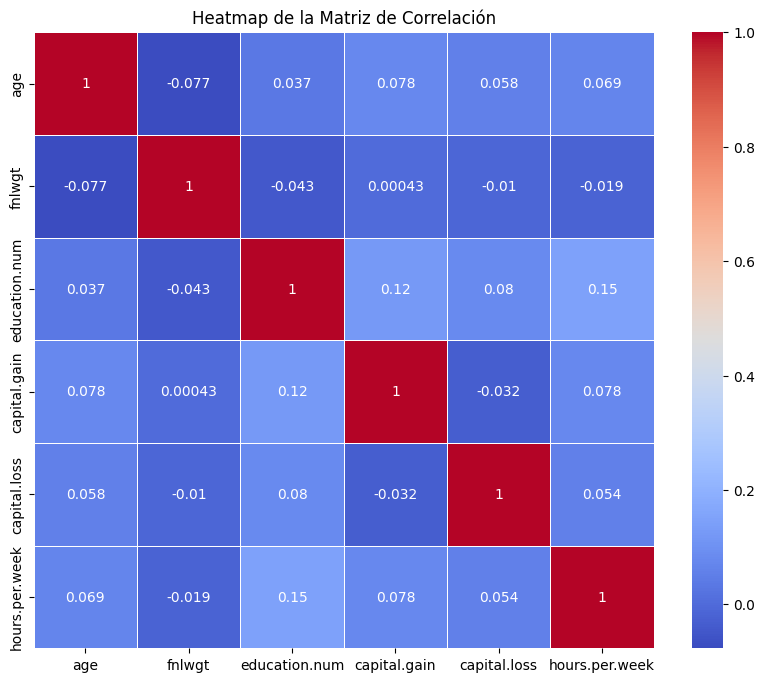

In [13]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
corr_matrix = numeric_cols.corr()

# Graficar el heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

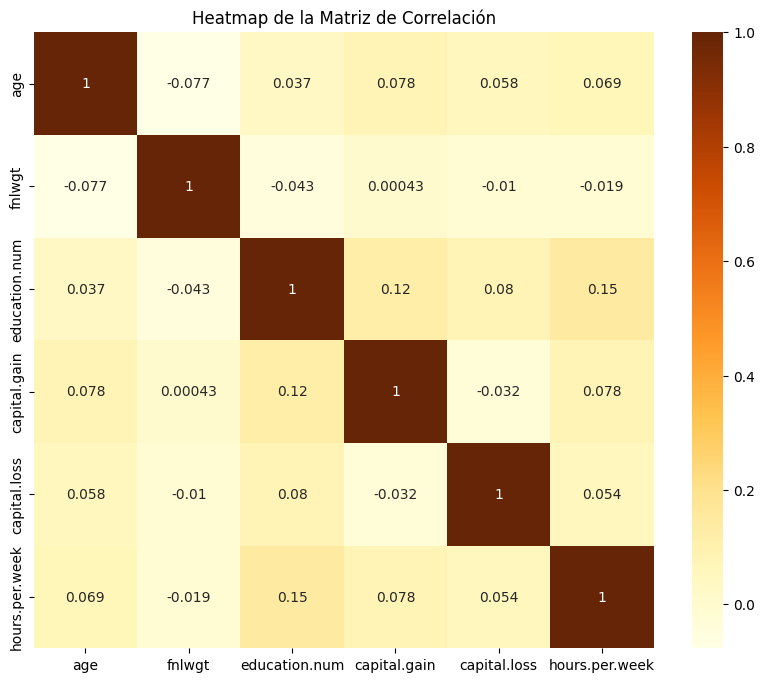

In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
df1_corr_mat = numeric_cols.corr()

# Graficar el heatmap de la matriz de correlación
fig, ax = plt.subplots(figsize=(10, 8))  # Ajustar el tamaño de la figura para una mejor visualización
sns.heatmap(df1_corr_mat, annot=True, cmap='YlOrBr', ax=ax)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

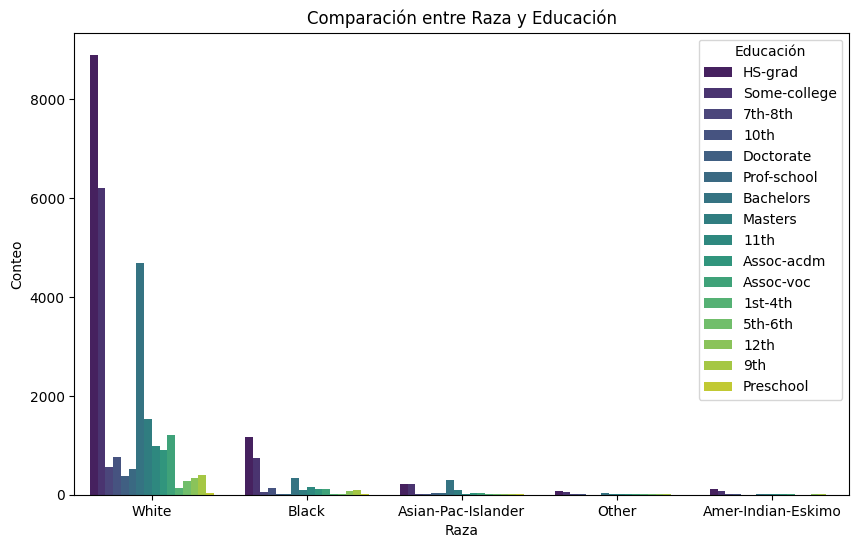

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='race', hue='education', palette='viridis')
plt.title('Comparación entre Raza y Educación')
plt.xlabel('Raza')
plt.ylabel('Conteo')
plt.legend(title='Educación')
plt.show()

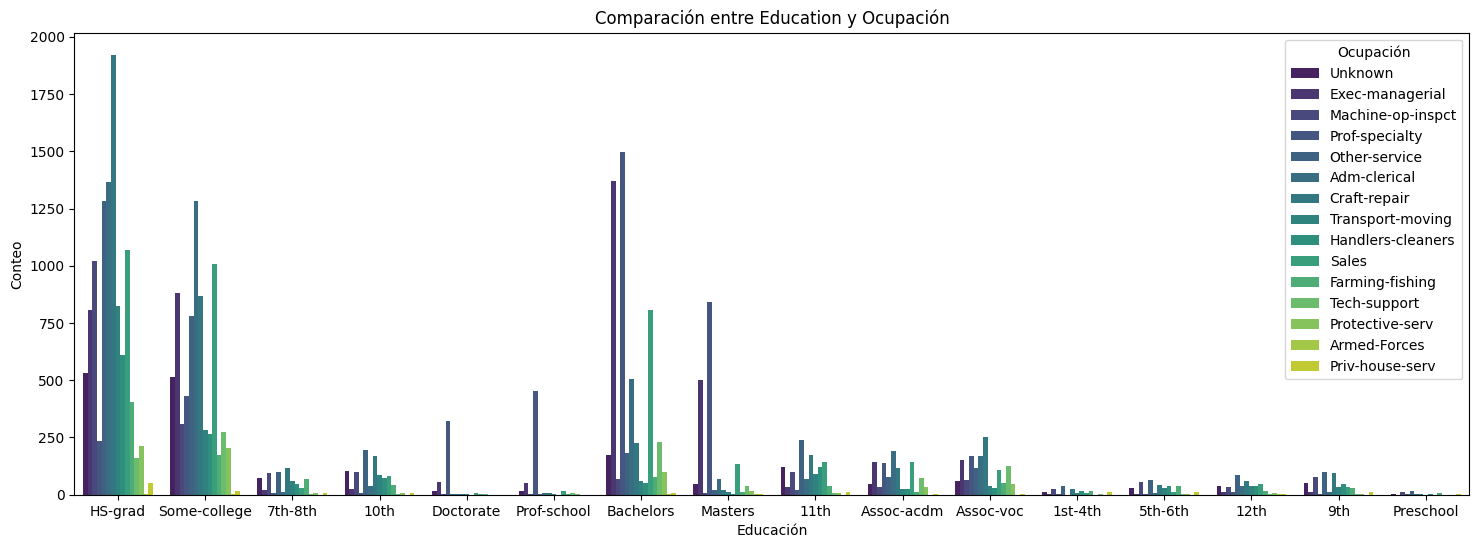

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(data=data, x='education', hue='occupation', palette='viridis')
plt.title('Comparación entre Education y Ocupación')
plt.xlabel('Educación')
plt.ylabel('Conteo')
plt.legend(title='Ocupación')
plt.show()

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(data=data, x='occupation', hue='workclass', palette='viridis')
plt.title('Comparación entre Educación e Income')
plt.xlabel('Educación')
plt.ylabel('Conteo')
plt.legend(title='Income')
plt.show()

In [ ]:
data["race"].describe()

count     32561
unique        5
top       White
freq      27816
Name: race, dtype: object

In [14]:
data_dummies = pd.get_dummies(data, columns=['education', 'workclass', 'income'])

In [15]:
data.drop(columns=['fnlwgt'], inplace=True)

In [16]:
data.head()

age workclass     education  education.num marital.status  \
0   90   Unknown       HS-grad              9        Widowed   
1   82   Private       HS-grad              9        Widowed   
2   66   Unknown  Some-college             10        Widowed   
3   54   Private       7th-8th              4       Divorced   
4   41   Private  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0            Unknown  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2            Unknown      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [ ]:
data.shape

(32561, 14)

In [ ]:
data["age"].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [ ]:
data["income"].describe()

In [ ]:
data["age"].describe()

In [ ]:
data["education"].describe()

In [ ]:
data["workclass"].describe()

In [ ]:
data["marital.status"].describe()

In [ ]:
data["relationship"].describe()

In [ ]:
data["hours.per.week"].describe()

In [17]:
data.head()

age workclass     education  education.num marital.status  \
0   90   Unknown       HS-grad              9        Widowed   
1   82   Private       HS-grad              9        Widowed   
2   66   Unknown  Some-college             10        Widowed   
3   54   Private       7th-8th              4       Divorced   
4   41   Private  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0            Unknown  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2            Unknown      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

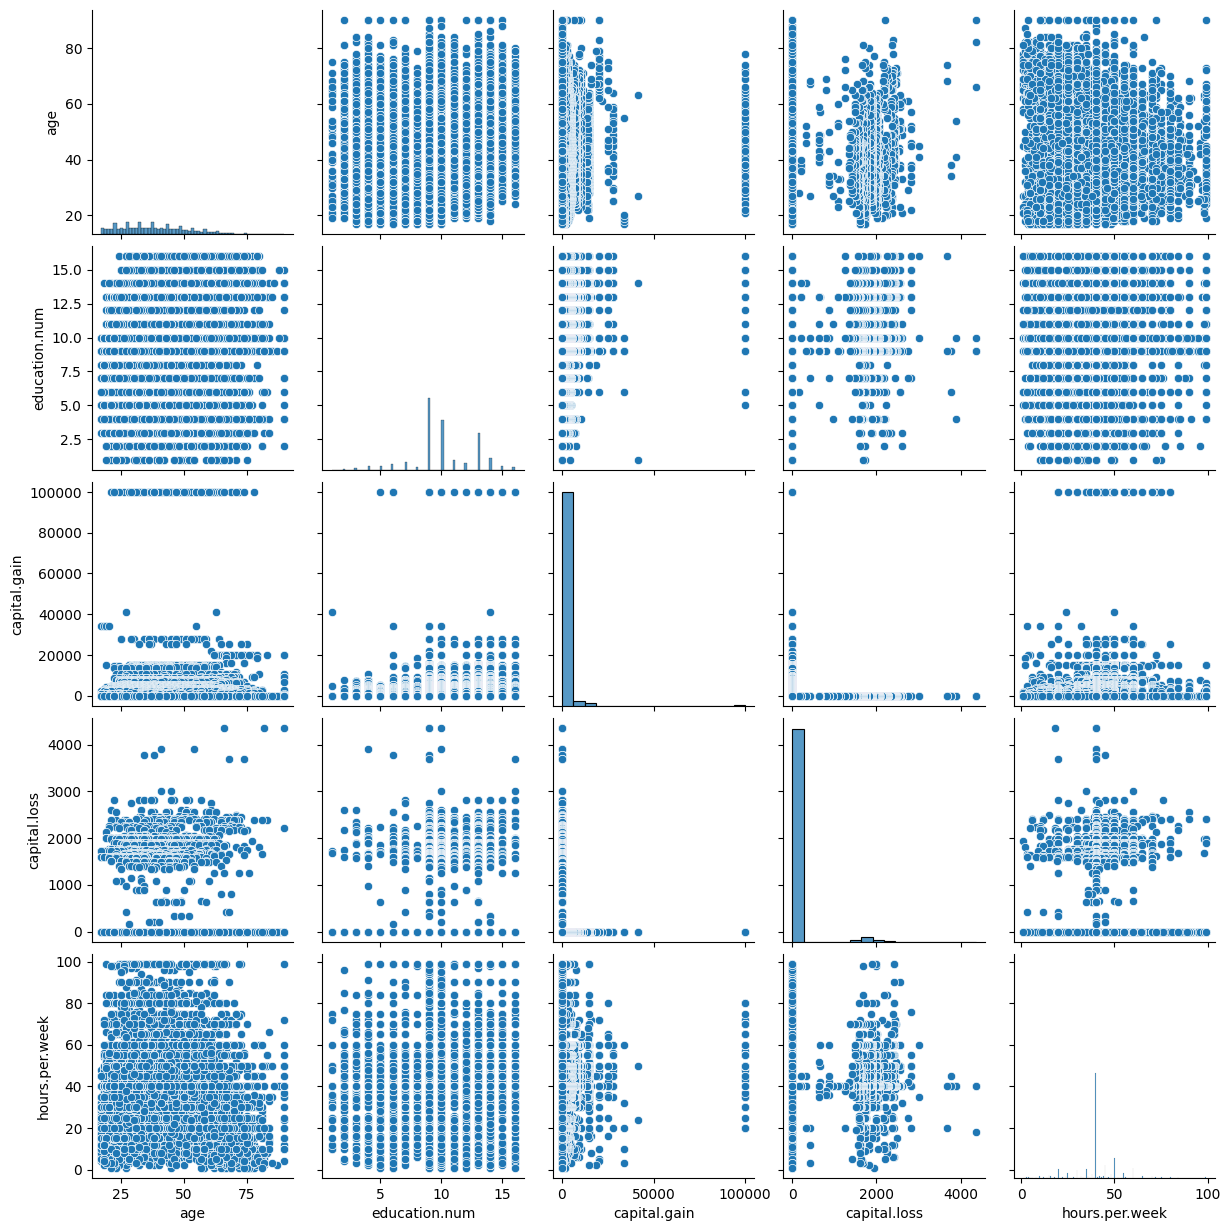

In [ ]:
sns.pairplot(data)

In [ ]:
data.head()

age  education.num  capital.gain  capital.loss  hours.per.week  \
0  3.769612      -0.420060      -0.14592     10.593507       -0.035429   
1  3.183112      -0.420060      -0.14592     10.593507       -1.817204   
2  2.010110      -0.031360      -0.14592     10.593507       -0.035429   
3  1.130359      -2.363558      -0.14592      9.461864       -0.035429   
4  0.177296      -0.031360      -0.14592      9.461864       -0.035429   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                False                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  workclass_Self-emp-inc  ...  native.country_South  \
0              False                   False  ...                 False   
1               True                   False  ...                 False   
2              False                   False  ...                 False   
3               True                   False  ...                 False   
4               True                   False  ...                 False   

   native.country_Taiwan  native.country_Thailand  \
0                  False                    False   
1                  False                    False   
2                  False                    False   
3                  False                    False   
4                  False                    False   

   native.country_Trinadad&Tobago  native.country_United-States  \
0                           False                          True   
1                           False                          True   
2                           False                          True   
3                           False                          True   
4                           False                          True   

   native.country_Unknown  native.country_Vietnam  native.country_Yugoslavia  \
0                   False                   False                      False   
1                   False                   False                      False   
2                   False                   False                      False   
3                   False                   False                      False   
4                   False                   False                      False   

   income_<=50K  income_>50K  
0          True        False  
1          True        False  
2          True        False  
3          True        False  
4          True        False  

[5 rows x 109 columns]

In [ ]:
data.columns


Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       ...
       'native.country_South', 'native.country_Taiwan',
       'native.country_Thailand', 'native.country_Trinadad&Tobago',
       'native.country_United-States', 'native.country_Unknown',
       'native.country_Vietnam', 'native.country_Yugoslavia', 'income_<=50K',
       'income_>50K'],
      dtype='object', length=109)

PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_cov = pd.get_dummies(data)


data_cov = data_cov.cov()
print(data_cov)

                                   age  education.num  capital.gain  \
age                         186.061400       1.281849  7.824819e+03   
education.num                 1.281849       6.618890  2.330008e+03   
capital.gain               7824.818537    2330.007877  5.454254e+07   
capital.loss                317.560742      82.856445 -9.408576e+04   
hours.per.week               11.580130       4.705338  7.150032e+03   
...                                ...            ...           ...   
native.country_Unknown        0.002577       0.009274  1.305070e+01   
native.country_Vietnam       -0.009305      -0.000872 -8.581840e-01   
native.country_Yugoslavia     0.000113      -0.000070 -3.589184e-01   
income_<=50K                 -1.364997      -0.368685 -7.052309e+02   
income_>50K                   1.364997       0.368685  7.052309e+02   

                            capital.loss  hours.per.week  \
age                           317.560742       11.580130   
education.num              

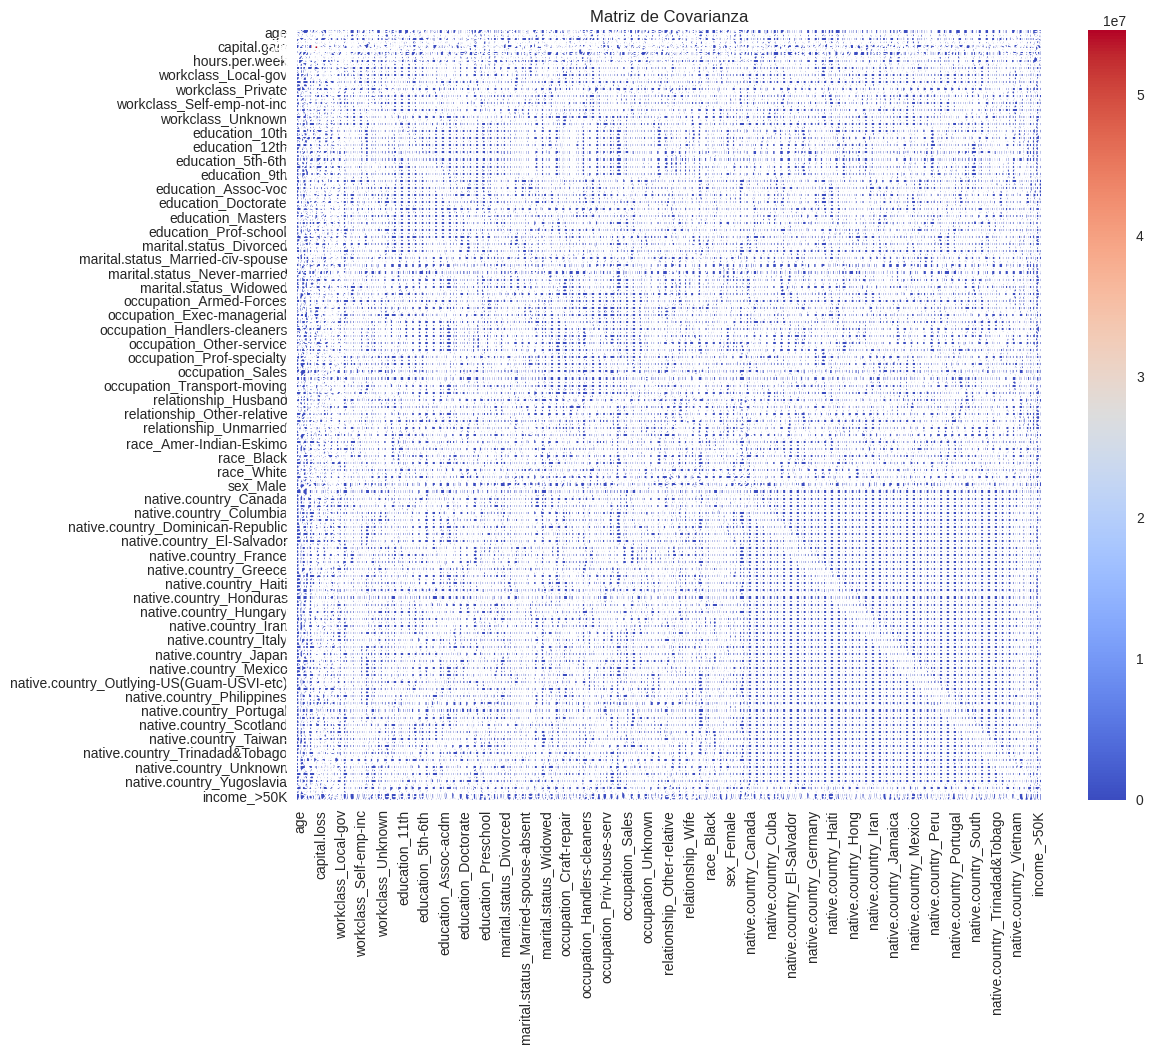

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_cov, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Covarianza')
plt.show()

In [ ]:
ss = StandardScaler()
x_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
X_subset = data[x_cols]
data[x_cols] = ss.fit_transform(X_subset)
print(data)

            age workclass     education  education.num      marital.status  \
0      3.769612   Unknown       HS-grad      -0.420060             Widowed   
1      3.183112   Private       HS-grad      -0.420060             Widowed   
2      2.010110   Unknown  Some-college      -0.031360             Widowed   
3      1.130359   Private       7th-8th      -2.363558            Divorced   
4      0.177296   Private  Some-college      -0.031360           Separated   
...         ...       ...           ...            ...                 ...   
32556 -1.215643   Private  Some-college      -0.031360       Never-married   
32557 -0.849080   Private    Assoc-acdm       0.746039  Married-civ-spouse   
32558  0.103983   Private       HS-grad      -0.420060  Married-civ-spouse   
32559  1.423610   Private       HS-grad      -0.420060             Widowed   
32560 -1.215643   Private       HS-grad      -0.420060       Never-married   

              occupation   relationship   race     sex  capital

In [ ]:
ss = StandardScaler()
x_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
X_subset = data[x_cols]
data[x_cols] = ss.fit_transform(X_subset)
print(data)



            age workclass     education  education.num      marital.status  \
0      3.769612   Unknown       HS-grad      -0.420060             Widowed   
1      3.183112   Private       HS-grad      -0.420060             Widowed   
2      2.010110   Unknown  Some-college      -0.031360             Widowed   
3      1.130359   Private       7th-8th      -2.363558            Divorced   
4      0.177296   Private  Some-college      -0.031360           Separated   
...         ...       ...           ...            ...                 ...   
32556 -1.215643   Private  Some-college      -0.031360       Never-married   
32557 -0.849080   Private    Assoc-acdm       0.746039  Married-civ-spouse   
32558  0.103983   Private       HS-grad      -0.420060  Married-civ-spouse   
32559  1.423610   Private       HS-grad      -0.420060             Widowed   
32560 -1.215643   Private       HS-grad      -0.420060       Never-married   

              occupation   relationship   race     sex  capital

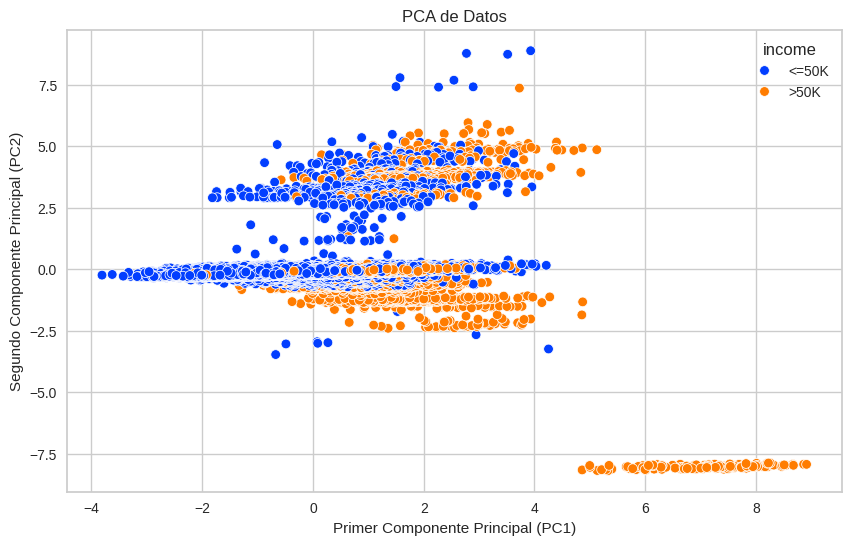

Varianza explicada por el PC1: 0.26
Varianza explicada por el PC2: 0.21


In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])


# Aplicar PCA
pca = PCA(n_components=2)  # Elegir 2 componentes principales para visualizar en 2D
pca_result = pca.fit_transform(scaled_data)

# Crear un DataFrame con los resultados del PCA
pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

if 'income' in data.columns:
    pca_data['income'] = data['income']
elif 'target' in data.columns:
    pca_data['income'] = data['target']
else:
    print("Warning: No 'income' or 'target' column found. The scatterplot will not be colored by class.")

# Visualizar los resultados del PCA
plt.figure(figsize=(10, 6))

if 'income' in pca_data.columns:
    sns.scatterplot(x='PC1', y='PC2', hue='income', data=pca_data, palette='bright')
else:
    sns.scatterplot(x='PC1', y='PC2', data=pca_data, palette='bright')
plt.title('PCA de Datos')
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.show()

# Mostrar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por el PC1: {explained_variance[0]:.2f}')
print(f'Varianza explicada por el PC2: {explained_variance[1]:.2f}')

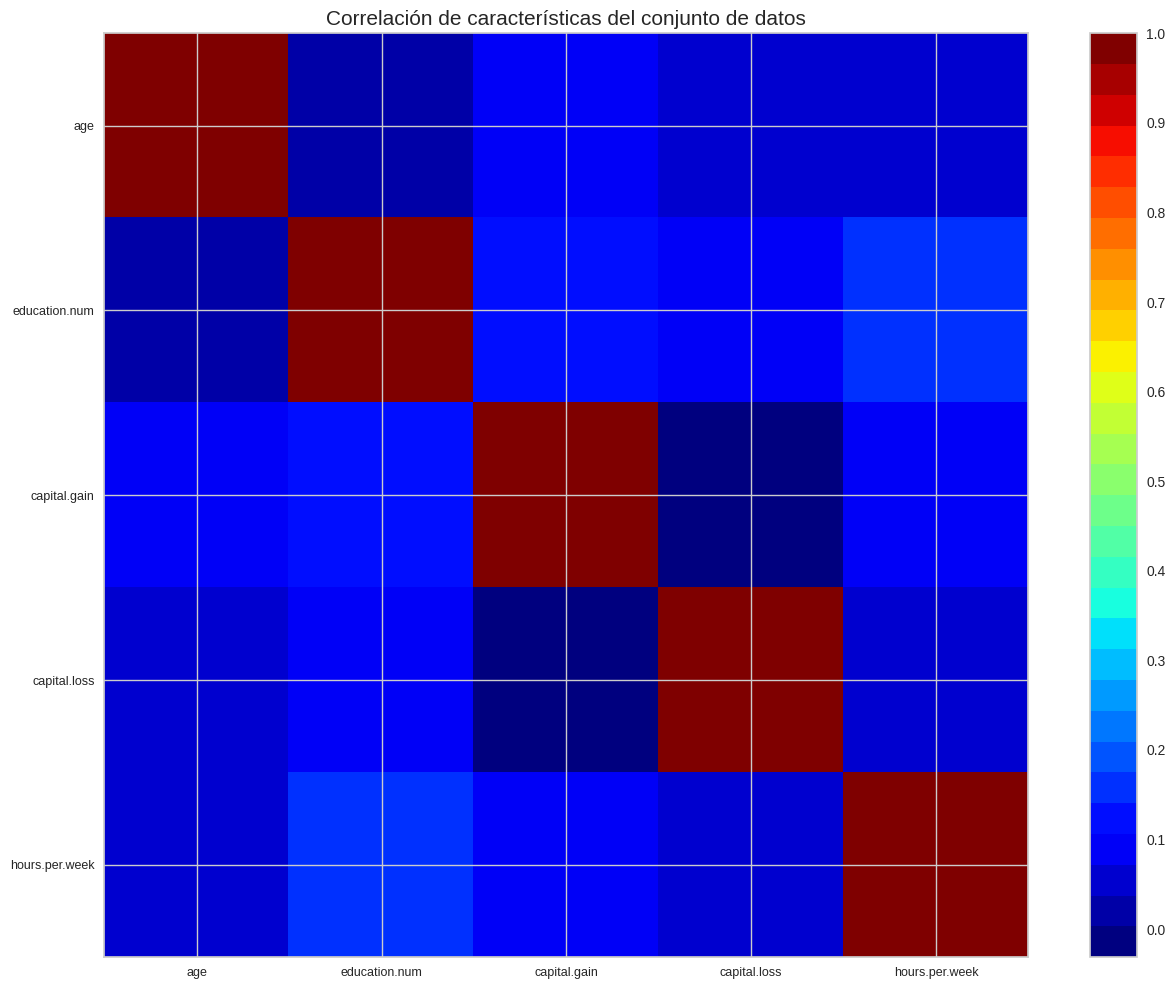

In [ ]:
import matplotlib.cm as cm # Import the cm module for colormaps

def correlation_matrix(data):
    # Seleccionar solo columnas numéricas para calcular la correlación
    numeric_data = data.select_dtypes(include=['int64', 'float64'])

    fig = plt.figure(figsize=(16, 12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap("jet", 30)

    # Calcular correlación en datos numéricos solamente
    cax = ax1.imshow(numeric_data.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)

    plt.title("Correlación de características del conjunto de datos", fontsize=15)
    labels = numeric_data.columns  # Usar etiquetas de datos numéricos

    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    ax1.set_xticklabels(labels, fontsize=9)
    ax1.set_yticklabels(labels, fontsize=9)

    # Añadir barra de color
    fig.colorbar(cax, ticks=[0.1 * i for i in range(-11, 11)])
    plt.show()


correlation_matrix(data)

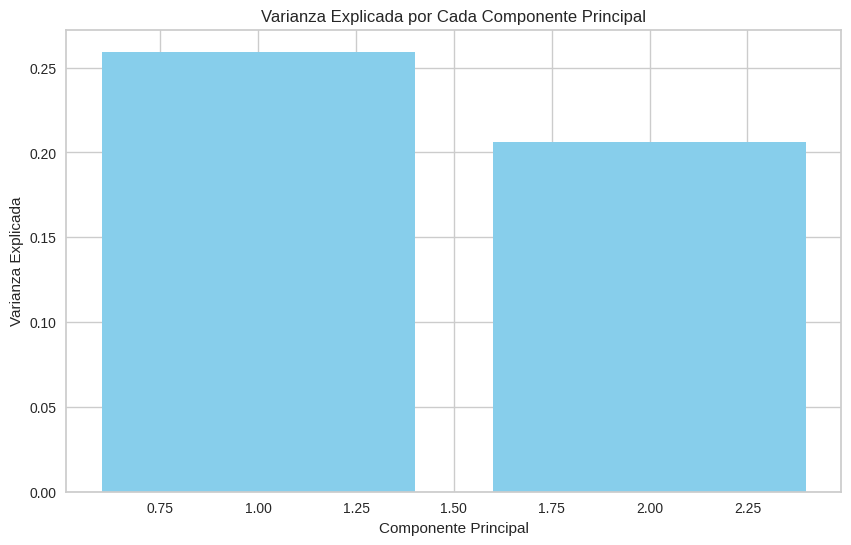

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.grid(True)
plt.show()

                     PC1       PC2
age             0.360978  0.079744
education.num   0.565057 -0.011184
capital.gain    0.439483 -0.590667
capital.loss    0.272906  0.802157
hours.per.week  0.531774  0.034242


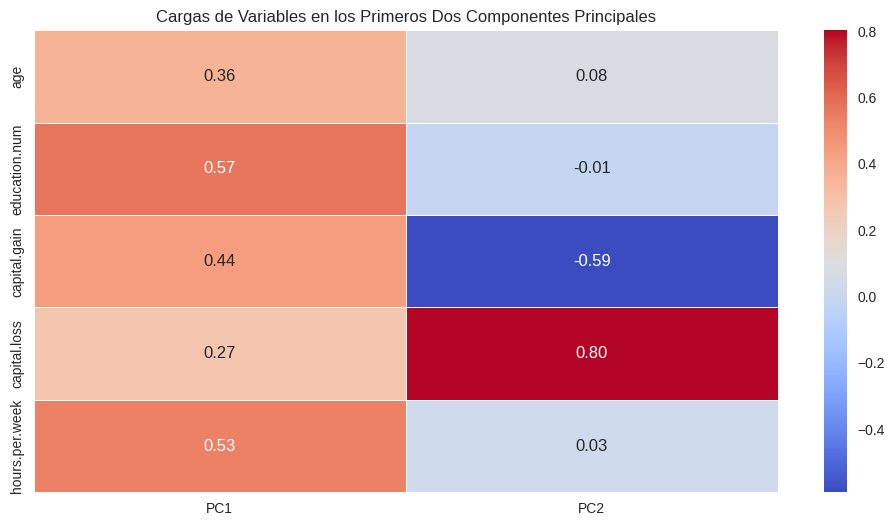

In [ ]:
pca_loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=x_cols)
print(pca_loadings)

# Gráfico de cargas de variables en los primeros dos componentes principales
plt.figure(figsize=(12, 6))
sns.heatmap(pca_loadings[['PC1', 'PC2']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Cargas de Variables en los Primeros Dos Componentes Principales')
plt.show()

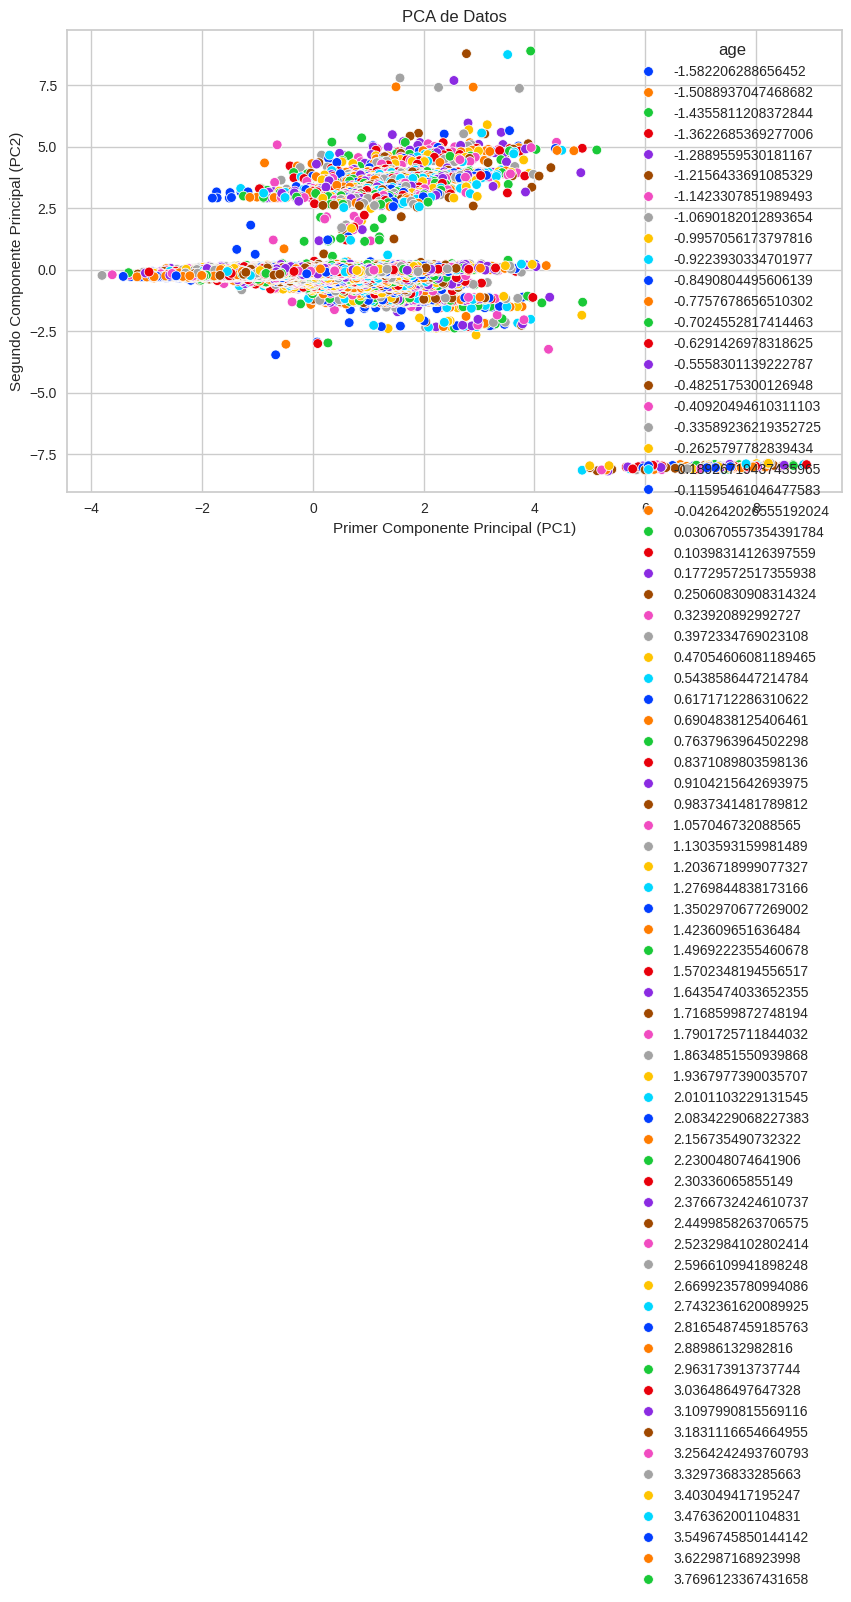

Varianza explicada por el PC1: 0.26
Varianza explicada por el PC2: 0.21


In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# Aplicar PCA
pca = PCA(n_components=2)  # Elegir 2 componentes principales para visualizar en 2D
pca_result = pca.fit_transform(scaled_data)

# Crear un DataFrame con los resultados del PCA
pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_data['age'] = data['age']

# Visualizar los resultados del PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='age', data=pca_data, palette='bright')
plt.title('PCA de Datos')
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.show()

# Mostrar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por el PC1: {explained_variance[0]:.2f}')
print(f'Varianza explicada por el PC2: {explained_variance[1]:.2f}')

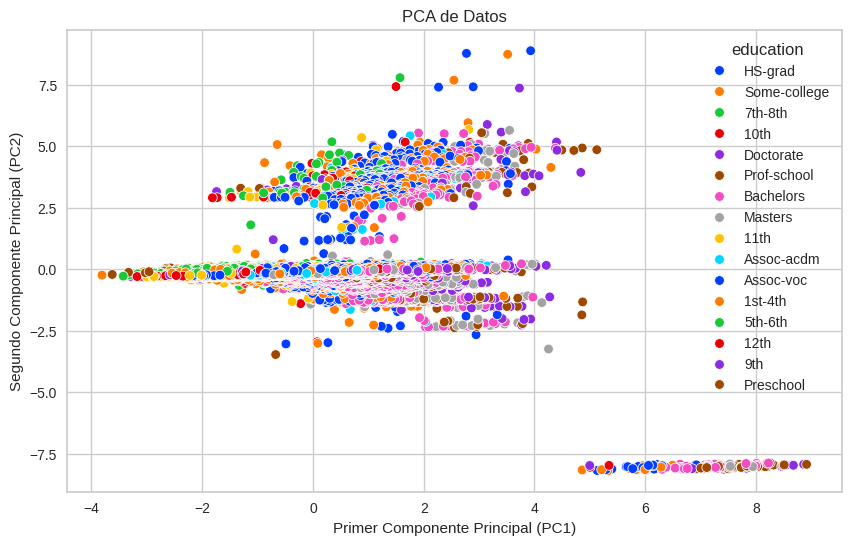

Varianza explicada por el PC1: 0.26
Varianza explicada por el PC2: 0.21


In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# Aplicar PCA
pca = PCA(n_components=2)  # Elegir 2 componentes principales para visualizar en 2D
pca_result = pca.fit_transform(scaled_data)

# Crear un DataFrame con los resultados del PCA
pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_data['education'] = data['education']

# Visualizar los resultados del PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='education', data=pca_data, palette='bright')
plt.title('PCA de Datos')
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.show()

# Mostrar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por el PC1: {explained_variance[0]:.2f}')
print(f'Varianza explicada por el PC2: {explained_variance[1]:.2f}')

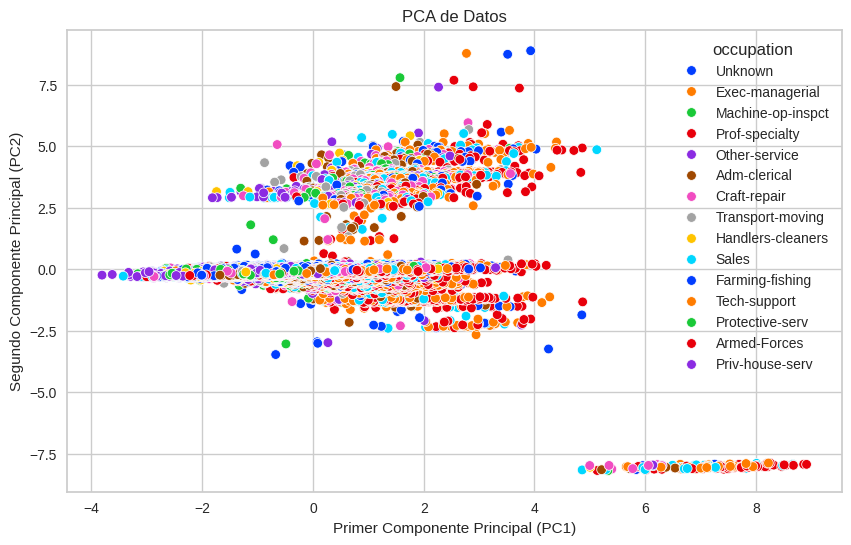

Varianza explicada por el PC1: 0.26
Varianza explicada por el PC2: 0.21


In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# Aplicar PCA
pca = PCA(n_components=2)  # Elegir 2 componentes principales para visualizar en 2D
pca_result = pca.fit_transform(scaled_data)

# Crear un DataFrame con los resultados del PCA
pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_data['occupation'] = data['occupation']

# Visualizar los resultados del PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='occupation', data=pca_data, palette='bright')
plt.title('PCA de Datos')
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.show()

# Mostrar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por el PC1: {explained_variance[0]:.2f}')
print(f'Varianza explicada por el PC2: {explained_variance[1]:.2f}')

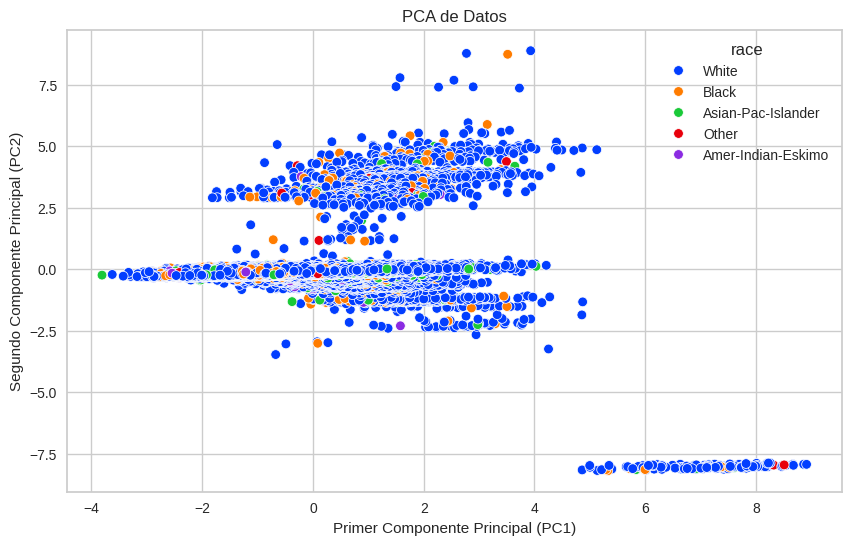

Varianza explicada por el PC1: 0.26
Varianza explicada por el PC2: 0.21


In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# Aplicar PCA
pca = PCA(n_components=2)  # Elegir 2 componentes principales para visualizar en 2D
pca_result = pca.fit_transform(scaled_data)

# Crear un DataFrame con los resultados del PCA
pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_data['race'] = data['race']

# Visualizar los resultados del PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='race', data=pca_data, palette='bright')
plt.title('PCA de Datos')
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.show()

# Mostrar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por el PC1: {explained_variance[0]:.2f}')
print(f'Varianza explicada por el PC2: {explained_variance[1]:.2f}')

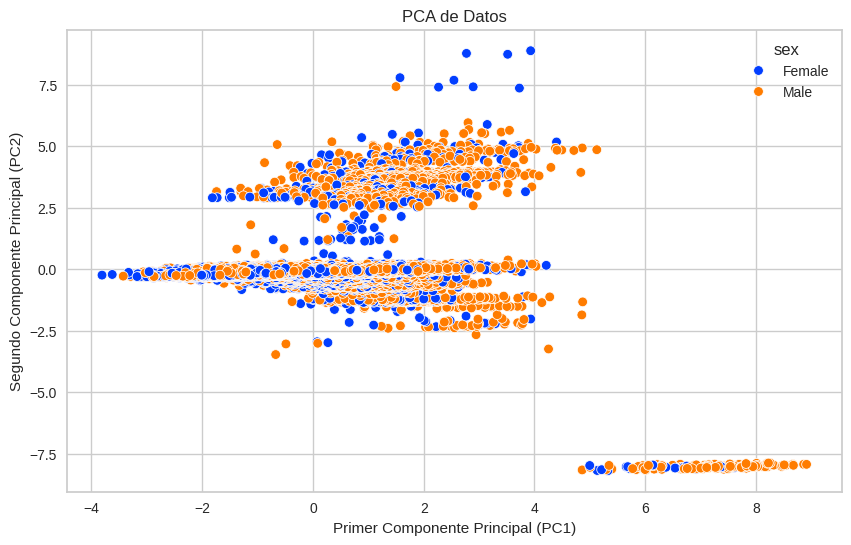

Varianza explicada por el PC1: 0.26
Varianza explicada por el PC2: 0.21


In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# Aplicar PCA
pca = PCA(n_components=2)  # Elegir 2 componentes principales para visualizar en 2D
pca_result = pca.fit_transform(scaled_data)

pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])


pca_data['sex'] = data['sex']

# Visualizar los resultados del PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='sex', data=pca_data, palette='bright')
plt.title('PCA de Datos')
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.show()

# Mostrar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por el PC1: {explained_variance[0]:.2f}')
print(f'Varianza explicada por el PC2: {explained_variance[1]:.2f}')

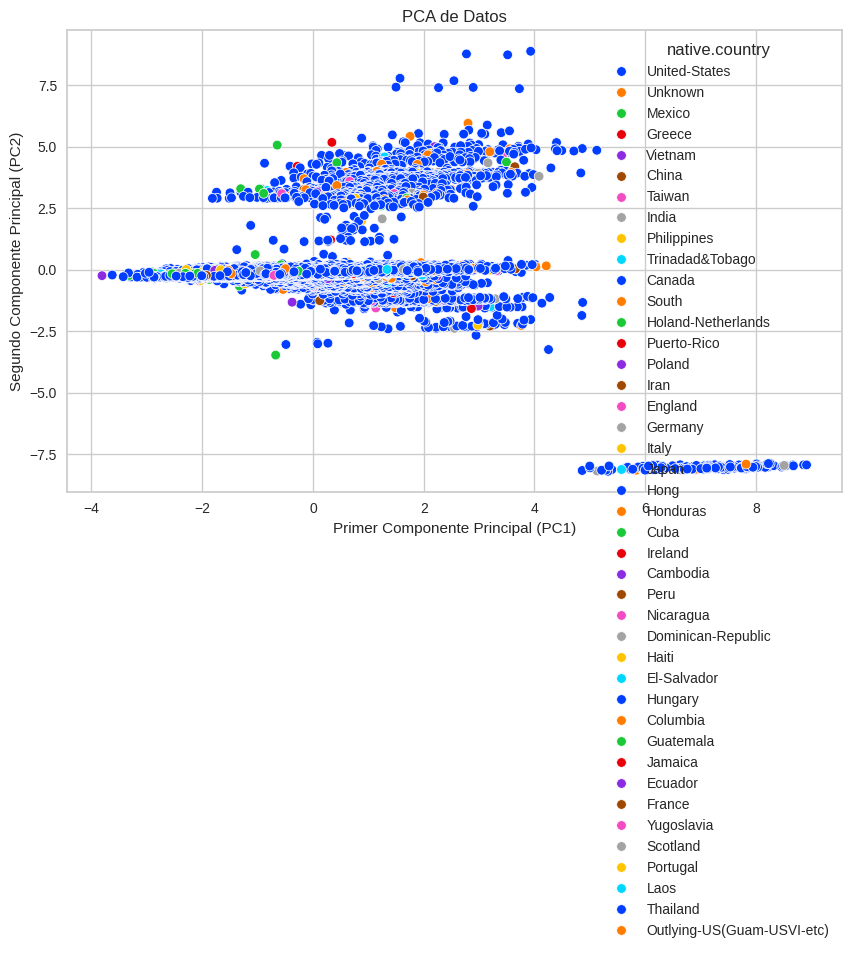

Varianza explicada por el PC1: 0.26
Varianza explicada por el PC2: 0.21


In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])


scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])


pca_data['native.country'] = data['native.country']

# Visualizar los resultados del PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='native.country', data=pca_data, palette='bright')
plt.title('PCA de Datos')
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.show()

# Mostrar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por el PC1: {explained_variance[0]:.2f}')
print(f'Varianza explicada por el PC2: {explained_variance[1]:.2f}')

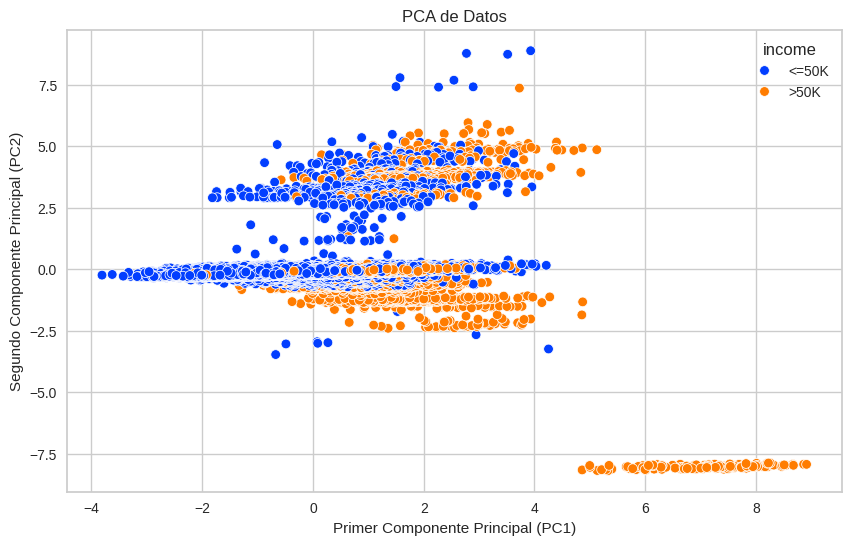

Varianza explicada por el PC1: 0.26
Varianza explicada por el PC2: 0.21


In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# Aplicar PCA
pca = PCA(n_components=2)  # Elegir 2 componentes principales para visualizar en 2D
pca_result = pca.fit_transform(scaled_data)

# Crear un DataFrame con los resultados del PCA
pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])


pca_data['income'] = data['income']

# Visualizar los resultados del PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='income', data=pca_data, palette='bright')
plt.title('PCA de Datos')
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.show()

# Mostrar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por el PC1: {explained_variance[0]:.2f}')
print(f'Varianza explicada por el PC2: {explained_variance[1]:.2f}')

K-MEANS

In [ ]:
data.head()

age workclass     education  education.num marital.status  \
1  3.183112   Private       HS-grad      -0.420060        Widowed   
3  1.130359   Private       7th-8th      -2.363558       Divorced   
4  0.177296   Private  Some-college      -0.031360      Separated   
5 -0.335892   Private       HS-grad      -0.420060       Divorced   
6 -0.042642   Private          10th      -1.586158      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female      -0.14592   
3  Machine-op-inspct      Unmarried  White  Female      -0.14592   
4     Prof-specialty      Own-child  White  Female      -0.14592   
5      Other-service      Unmarried  White  Female      -0.14592   
6       Adm-clerical      Unmarried  White    Male      -0.14592   

   capital.loss  hours.per.week native.country  income  Cluster  clusters_4k  
1     10.593507       -1.817204  United-States       0        2            1  
3      9.461864       -0.035429  United-States       0        2            1  
4      9.461864       -0.035429  United-States       0        0            1  
5      9.139246        0.369519  United-States       0        0            0  
6      9.139246       -0.035429  United-States       0        0            2

In [ ]:
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Selección de características relevantes
data_for_clustering = data[['age', 'income']]

# Estandarización de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

In [ ]:
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=123)
modelo_kmeans.fit(X=data_scaled)

# Predecir clusters
y_predict = modelo_kmeans.predict(data_scaled)

In [ ]:

data = data.replace('Unknown', np.nan)
data = data.dropna()


data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)


data_for_clustering = data[['age', 'income']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)





In [ ]:
kmeans.labels_

array([2, 2, 0, ..., 0, 2, 1], dtype=int32)

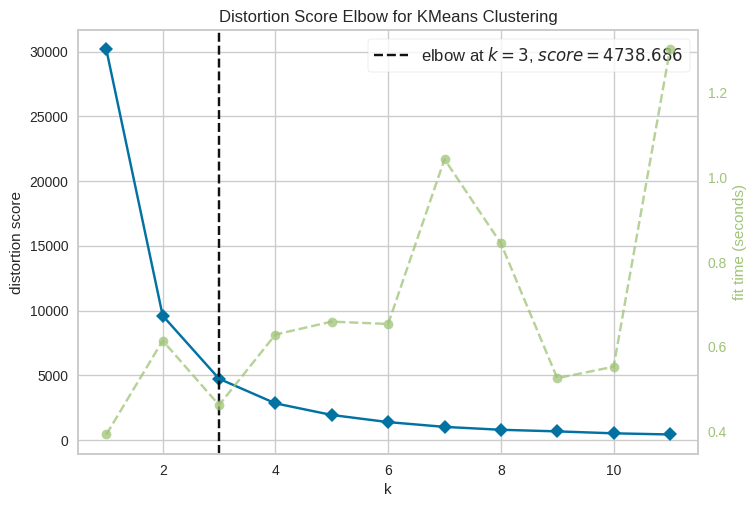

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import yellowbrick


data_for_clustering = data[['age', 'income']]
data_for_clustering = data_for_clustering.replace('Unknown', np.nan).dropna()
data_for_clustering['income'] = data_for_clustering['income'].apply(lambda x: 1 if x == '>50K' else 0)


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)


model = KMeans()
visualizer = yellowbrick.cluster.elbow.KElbowVisualizer(model, k=(1, 12))
visualizer.fit(data_scaled)
visualizer.show()

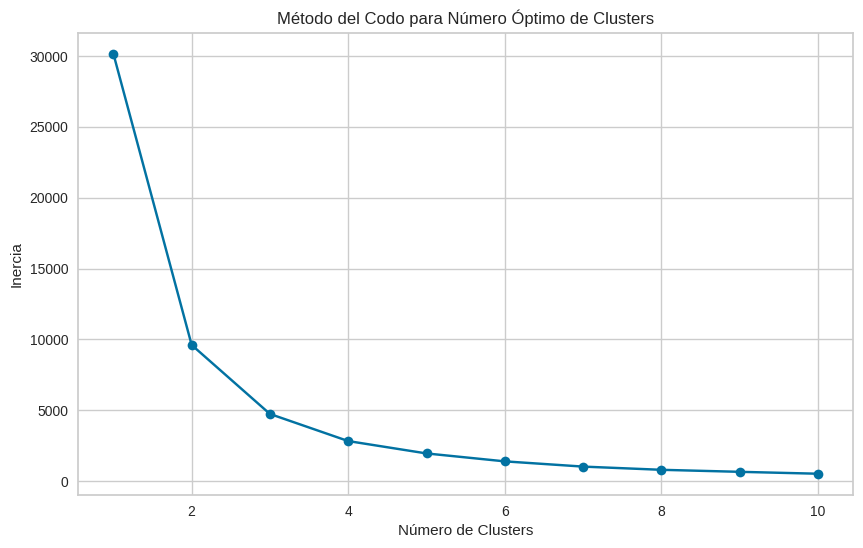

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determinar el número óptimo de clusters usando el método del codo
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

In [ ]:
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Agregar los clusters a los datos originales
data['Cluster'] = clusters

In [ ]:
!pip install plotly
import plotly.express as px

data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Selección de características relevantes
data_for_clustering = data[['age', 'income', 'capital.gain', 'hours.per.week']]

# Normalización de los datos
data_normalized = pd.DataFrame(normalize(data_for_clustering), columns=data_for_clustering.columns)

kmedia_4 = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300,
                  tol=0.0001, random_state=111, algorithm="elkan")

# Entrenamiento del modelo KMeans
kmedia_4.fit(data_normalized)
labels_4k = kmedia_4.labels_
centroides = kmedia_4.cluster_centers_


data["clusters_4k"] = labels_4k

fig = px.scatter_3d(data, x="age", y="capital.gain", z="hours.per.week", color="clusters_4k", width=800, height=800)

fig.show()

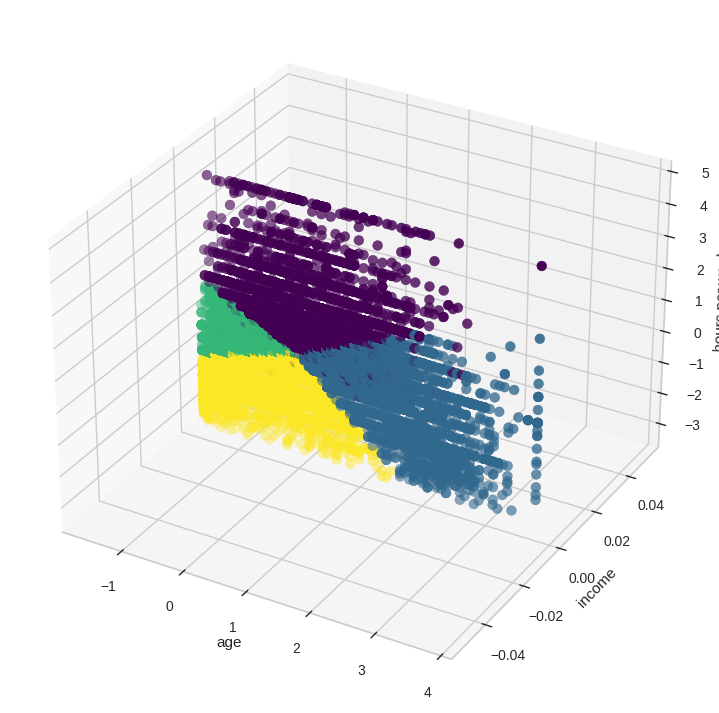

In [ ]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection="3d")

x = data["age"]
y = data["income"]

z = data["hours.per.week"]

ax.set_xlabel("age")
ax.set_ylabel("income")
ax.set_zlabel("hours.per.week")


ax.scatter(x, y, z, c=labels_4k, s=50, cmap="viridis")

plt.show()

**REGRESIÓN LINEAL**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.30)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)

0.12250710386796959

In [26]:
from sklearn.linear_model import LogisticRegression

modelo1 = LogisticRegression()
modelo1.fit(X_train_scaled, y_train)
print("test-set score:                   {:.3f}".format(modelo1.score(X_test, y_test)))

test-set score:                   0.782


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

modelo2 = LogisticRegression()
scores = cross_val_score(modelo2, X_train_scaled, y_train, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.01)


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

modelo3 = LogisticRegression()
param_grid = {"C":np.logspace(-3, 3, 13), "class_weight":["balanced", None]}
grid = GridSearchCV(estimator=modelo3, param_grid=param_grid, scoring="accuracy", cv=10, return_train_score=True)
grid.fit(X_train_scaled, y_train)

print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))

parametros3 = grid.best_params_

print("Best parameters:                  ", parametros3)
print("Test-set score:                   {:.3f}".format(grid.score(X_test, y_test)))

Best mean cross-validation score: 0.790
Best parameters:                   {'C': 10.0, 'class_weight': None}
Test-set score:                   0.782


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold # Import KFold

modelo4 = LogisticRegression()
kfold = KFold(n_splits=10, random_state=5, shuffle=True)

param_grid = {"C":np.logspace(-3, 3, 13), "class_weight":["balanced", None]}
grid = GridSearchCV(estimator=modelo4, param_grid=param_grid, scoring="accuracy", cv=kfold, return_train_score=True)
grid.fit(X_train_scaled, y_train)

print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
parametros4 = grid.best_params_

print("Best parameters:                  ", parametros4)
print("Test-set score:                   {:.3f}".format(grid.score(X_test, y_test)))

Best mean cross-validation score: 0.789
Best parameters:                   {'C': 10.0, 'class_weight': None}
Test-set score:                   0.782


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [33]:
modelo3 = LogisticRegression(C=parametros3["C"], class_weight = parametros3["class_weight"])
modelo3.fit(X_train_scaled, y_train)

LogisticRegression(C=10.0)

In [34]:
modelo4 = LogisticRegression(C=parametros4["C"], class_weight=parametros4["class_weight"])
modelo4.fit(X_train_scaled, y_train)

LogisticRegression(C=10.0)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

modelo4 = LogisticRegression()
kfold = KFold(n_splits=10, random_state=5, shuffle=True)

param_grid = {"C":np.logspace(-3, 3, 13), "class_weight":["balanced", None]}
grid = GridSearchCV(estimator=modelo4, param_grid=param_grid, scoring="accuracy", cv=kfold, return_train_score=True)
grid.fit(X_train_scaled, y_train)

print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
parametros4 = grid.best_params_

print("Best parameters:                  ", parametros4)
print("Test-set score:                   {:.3f}".format(grid.score(X_test, y_test)))

predicciones1 = modelo1.predict(X_test_scaled)


print("Reporte de clasificación:\n", classification_report(y_test, predicciones1))
print("Matriz de confusión:\n", confusion_matrix(y_test, predicciones1))

# Datos para ROC curve (/AUC)
preds1 = modelo1.predict_proba(X_test_scaled)[:, 1]

fpr1, tpr1, thresholds = roc_curve(y_test, preds1)

Best mean cross-validation score: 0.789
Best parameters:                   {'C': 10.0, 'class_weight': None}
Test-set score:                   0.782
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.98      0.88      7410
           1       0.77      0.17      0.28      2359

    accuracy                           0.79      9769
   macro avg       0.78      0.58      0.58      9769
weighted avg       0.78      0.79      0.73      9769

Matriz de confusión:
 [[7289  121]
 [1950  409]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [38]:
predicciones3 = modelo3.predict(X_test_scaled)

print("Reporte de clasificación:\n", classification_report(y_test, predicciones3))
print("Matriz de confusión:\n", confusion_matrix(y_test, predicciones3))

# Datos para ROC curve  (/AUC)
preds3 = modelo3.predict_proba(X_test_scaled)[:, 1]
fpr3, tpr3, thresholds = roc_curve(y_test, preds3)

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.98      0.88      7410
           1       0.75      0.21      0.32      2359

    accuracy                           0.79      9769
   macro avg       0.77      0.59      0.60      9769
weighted avg       0.78      0.79      0.74      9769

Matriz de confusión:
 [[7249  161]
 [1874  485]]


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve


modelo4 = LogisticRegression()
kfold = KFold(n_splits=10, random_state=5, shuffle=True)

param_grid = {"C":np.logspace(-3, 3, 13), "class_weight":["balanced", None]}
grid = GridSearchCV(estimator=modelo4, param_grid=param_grid, scoring="accuracy", cv=kfold, return_train_score=True)


grid.fit(X_train_scaled, y_train)

print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
parametros4 = grid.best_params_

print("Best parameters:                  ", parametros4)
print("Test-set score:                   {:.3f}".format(grid.score(X_test, y_test)))


predicciones4 = grid.predict(X_test_scaled)

print("Reporte de clasificación:\n", classification_report(y_test, predicciones4))
print("Matriz de confusión:\n", confusion_matrix(y_test, predicciones4))

# Datos para ROC curve
preds4 = grid.predict_proba(X_test_scaled)[:, 1]
fpr4, tpr4, thresholds = roc_curve(y_test, preds4)

Best mean cross-validation score: 0.789
Best parameters:                   {'C': 10.0, 'class_weight': None}
Test-set score:                   0.782
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.98      0.88      7410
           1       0.75      0.21      0.32      2359

    accuracy                           0.79      9769
   macro avg       0.77      0.59      0.60      9769
weighted avg       0.78      0.79      0.74      9769

Matriz de confusión:
 [[7249  161]
 [1874  485]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


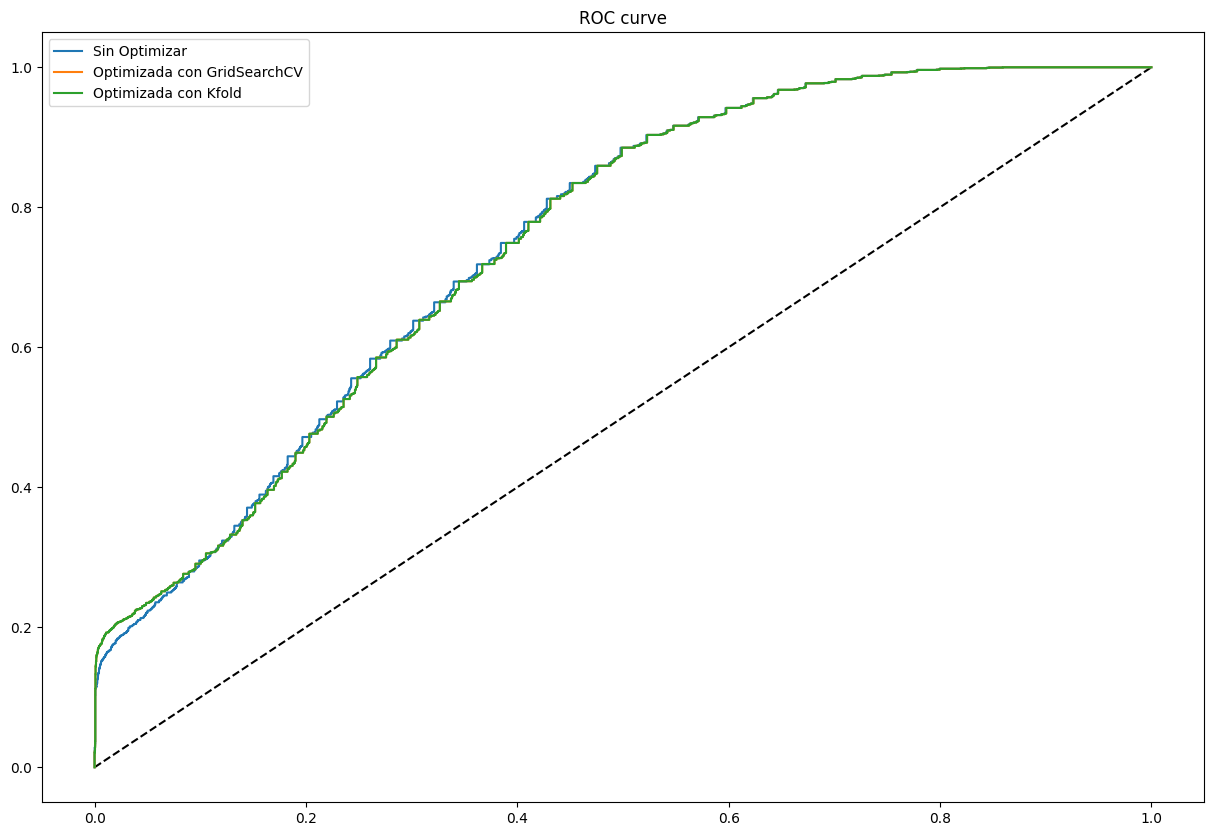

In [41]:
plt.figure(figsize=(15, 10))

plt.plot([0, 1], [0, 1], "k--")

plt.plot(fpr1, tpr1, label="Sin Optimizar")
plt.plot(fpr3, tpr3, label="Optimizada con GridSearchCV")
plt.plot(fpr4, tpr4, label="Optimizada con Kfold")

plt.xlabel("")
plt.ylabel("")

plt.title("ROC curve")
plt.legend(loc="best")

plt.show()